# Investigation into classifier looking at test area off of the Chinese coast

In [454]:
#
# imports
#
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import random
from mpl_toolkits.mplot3d import Axes3D

from keras.models import load_model

In [411]:
#
# setup paths
#
model_dir = "/home/mike/git/temp_sar/resources/model_v1.0"
crops_dir = "/home/mike/git/temp_sar/resources/crops"   # chinese turbine crops
shapefile_dir = "/home/mike/git/temp_sar/resources/results_shapefile"
training_crops_dir = "/home/mike/git/temp_sar/resources/training/50x50/turbine" 


In [287]:
#
# load models
#
cnn_50x50 = load_model(os.path.join(model_dir, "fcn_50x50_v1.h5"))
cnn_140x140 = load_model(os.path.join(model_dir, "fcn_140x140_v1.h5"))
cnn_240x240 = load_model(os.path.join(model_dir, "fcn_240x240_v1.h5"))

In [288]:
#
# load results shapefile
#
results_df = gpd.read_file(os.path.join(shapefile_dir, "S1A_IW_GRDH_1SDV_20170924T100355_20170924T100420_018516_01F333_9052_withactual.shp"))


In [289]:
#
# load Chinese crops
#
list_of_50x50_crops = []
list_of_140x140_crops = []
list_of_240x240_crops = []
crop_save_dir_50x50 = os.path.join(crops_dir, '50x50')
crop_save_dir_140x140 = os.path.join(crops_dir, '140x140')
crop_save_dir_240x240 = os.path.join(crops_dir, '240x240')

list_of_distance_to_land_features = []

for idx, row in results_df.iterrows():
    list_of_distance_to_land_features.append(row['distance'])
    file_path = os.path.join(crop_save_dir_50x50, row['image_id'] + '_' + str(row['blob_id']) + '.png')

    image = scipy.misc.imread(file_path, 0)
    if image is not None:
        list_of_50x50_crops.append(image)
    else:
        print("Cannot open file: " + file_path)

    file_path = os.path.join(crop_save_dir_140x140, row['image_id'] + '_' + str(row['blob_id']) + '.png')
    image = scipy.misc.imread(file_path, 0)
    if image is not None:
        list_of_140x140_crops.append(image)
    else:
        print("Cannot open file: " + file_path)

    file_path = os.path.join(crop_save_dir_240x240, row['image_id'] + '_' + str(row['blob_id']) + '.png')
    image = scipy.misc.imread(file_path, 0)
    if image is not None:
        list_of_240x240_crops.append(image)
    else:
        print("Cannot open file: " + file_path)

array_of_50x50_crops = np.asarray(list_of_50x50_crops)
array_of_140x140_crops = np.asarray(list_of_140x140_crops)
array_of_240x240_crops = np.asarray(list_of_240x240_crops)
array_of_distance_to_land_features = np.asarray(list_of_distance_to_land_features)
#array_of_distance_to_land_features = np.expand_dims(array_of_distance_to_land_features, axis=1)
#array_of_240x240_crops = np.expand_dims(array_of_240x240_crops, axis=3)
#array_of_140x140_crops = np.expand_dims(array_of_140x140_crops, axis=3)
#array_of_50x50_crops = np.expand_dims(array_of_50x50_crops, axis=3)

In [290]:
results_df_copy = results_df
results_df_copy['50_class'] = results_df_copy['50_class'].astype(str)

In [291]:
results_df_copy['50_class_key'] = results_df_copy['50_class'].str.split(':').str[0]

In [292]:
results_df_copy['50_class_value'] = results_df_copy['50_class'].str.split(':').str[1]

In [293]:
results_df_copy['50_class_value'] = results_df_copy['50_class_value'].str.rstrip('}')

In [294]:
results_df_copy['50_class_key'] = results_df_copy['50_class_key'].str.lstrip('{')


In [295]:
results_df_copy['50_class_key'] = results_df_copy['50_class_key'].str.strip('"')

In [296]:
mask = results_df_copy['Actual'] == 'Turbine'

In [297]:
df_only_turbines = results_df_copy[mask]


In [298]:
df_only_turbines['50_class_value'] = df_only_turbines['50_class_value'].astype('float')

/home/mike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [299]:
df_only_turbines.dtypes

image_id           object
blob_id             int64
latitude          float64
longitude         float64
persists           object
distance          float64
50_class           object
140_class          object
240_class          object
datetime           object
class_idx          object
50_prob            object
140_prob           object
240_prob           object
Actual             object
geometry           object
50_class_key       object
50_class_value    float64
dtype: object

In [300]:
prob_mask = df_only_turbines['50_class_value'] > 0.99

In [301]:
df_turbines_high_prob = df_only_turbines[prob_mask]

In [302]:
pred_turbine_mask = df_turbines_high_prob['50_class_key'] == 'turbine'

In [303]:
df_actual_turbines_high_pred_turbine = df_turbines_high_prob[pred_turbine_mask]

In [304]:
df_actual_turbines_high_pred_turbine

image_id  blob_id   latitude  \
96   S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...       96  34.487037   
97   S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...       97  34.488385   
127  S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...      127  34.506890   
141  S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...      141  34.513807   

      longitude persists  distance                         50_class  \
96   120.115521  [1,1,1]  8.158677  {"turbine": 0.9999922513961792}   
97   120.052639  [1,1,1]  5.152943  {"turbine": 0.9963855743408203}   
127  120.069168  [1,1,1]  7.185517  {"turbine": 0.9997745156288147}   
141  120.053178  [1,1,1]  6.913437  {"turbine": 0.9983812570571899}   

                           140_class                      240_class  \
96   {"turbine": 0.9476648569107056}  {"other": 0.9712021350860596}   
97     {"other": 0.9984133243560791}  {"other": 0.9997017979621887}   
127    {"other": 0.8891505599021912}  {"other": 0.9992417097091675}   
141  {"turbine": 0.5781727433204651}  {"other": 0.7545075416564941}   

             datetime                                   class_idx  \
96   2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   
97   2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   
127  2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   
141  2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   

                                               50_prob  \
96   [1.3117291075559478e-07,0.9999922513961792,7.5...   
97   [4.029594856547192e-05,0.9963855743408203,0.00...   
127  [4.229015758028254e-06,0.9997745156288147,0.00...   
141  [1.0620391549309716e-05,0.9983812570571899,0.0...   

                                              140_prob  \
96   [7.0190582235341026e-09,0.9476648569107056,0.0...   
97   [8.576956133765634e-06,0.0015780613757669926,0...   
127  [3.91226734564043e-07,0.11084911972284317,0.88...   
141  [1.1777326847095537e-07,0.5781727433204651,0.4...   

                                              240_prob   Actual  \
96   [3.627962726363236e-19,0.02879781275987625,0.9...  Turbine   
97   [9.573188053911552e-14,0.0002981343131978065,0...  Turbine   
127  [1.7586026222499856e-13,0.0007582645630463958,...  Turbine   
141  [1.9850022667244893e-11,0.24549248814582825,0....  Turbine   

                                        geometry 50_class_key  50_class_value  
96   POINT (120.1155206235562 34.48703748535408)      turbine        0.999992  
97   POINT (120.0526385536678 34.48838495828026)      turbine        0.996386  
127  POINT (120.0691675548956 34.50689025313311)      turbine        0.999775  
141  POINT (120.0531775428383 34.51380728082083)      turbine        0.998381

In [305]:
list_of_blob_ids = df_actual_turbines_high_pred_turbine['blob_id'].tolist()

In [321]:
list_of_blob_ids

[96, 97, 127, 141]

# Correctly predicted turbines

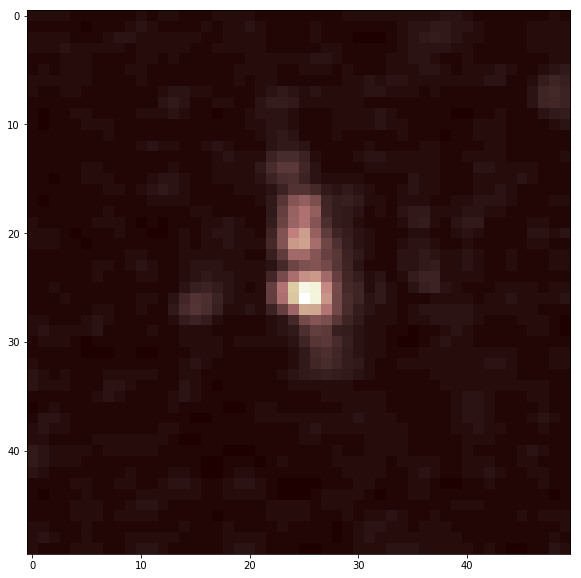

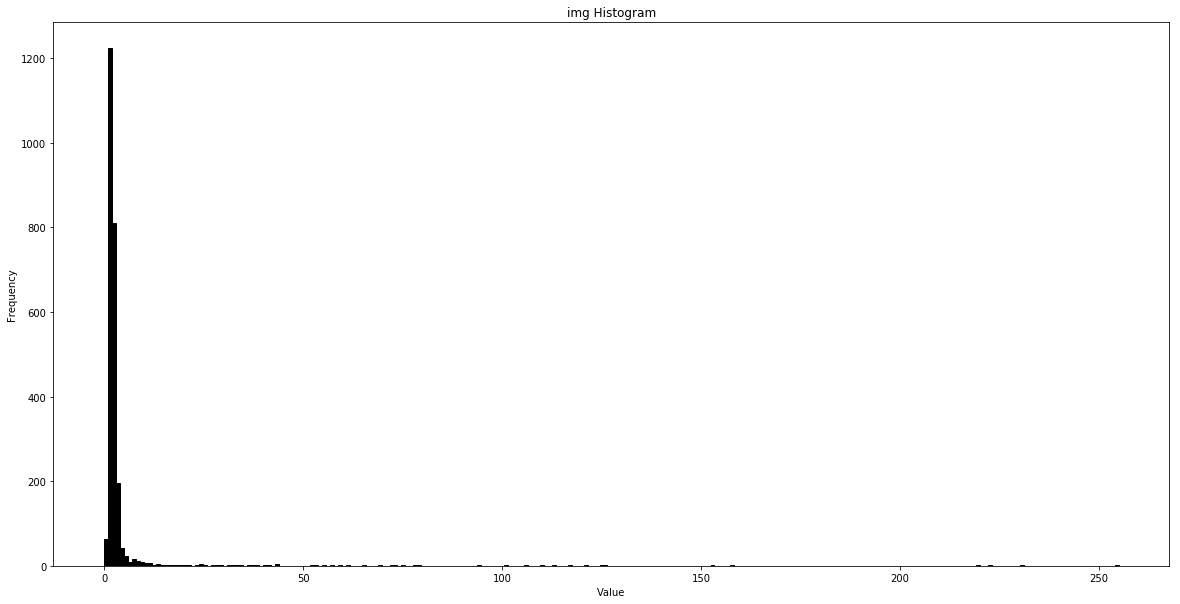

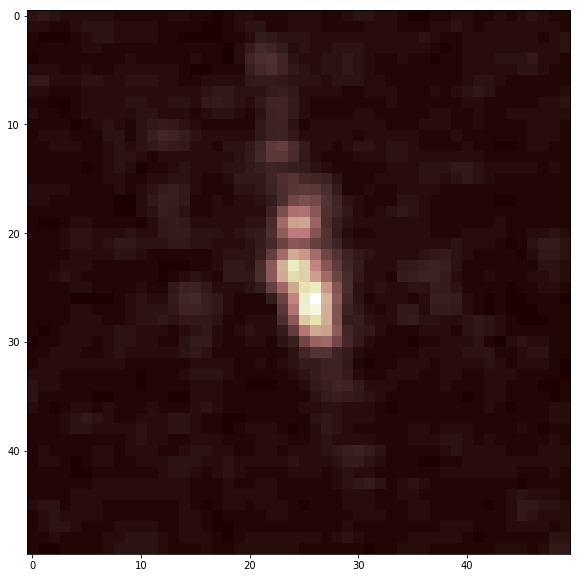

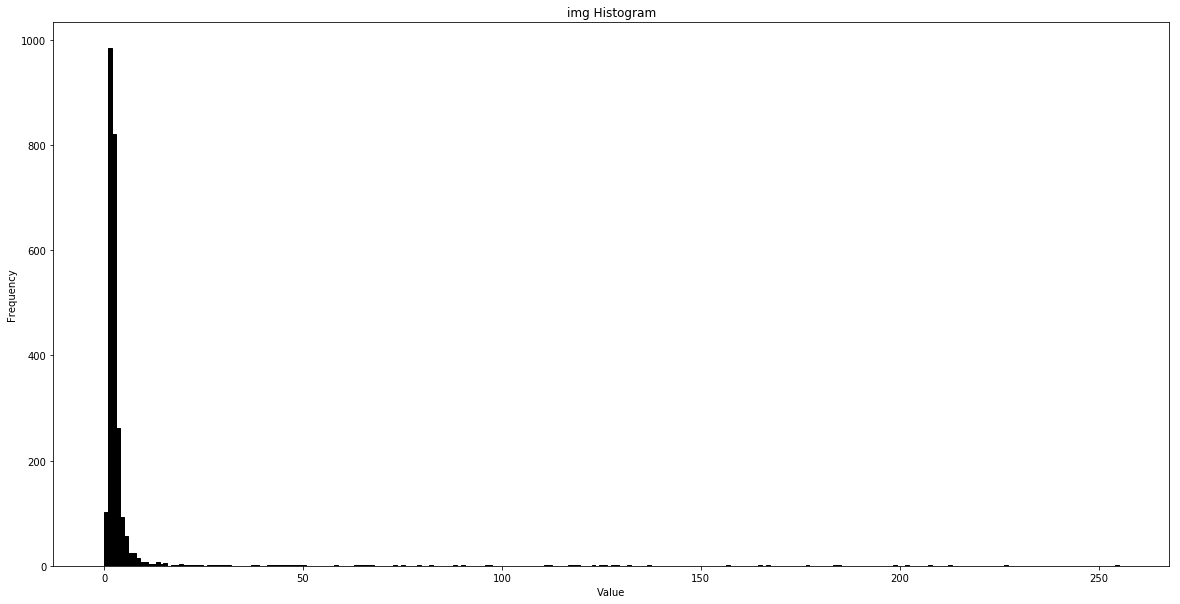

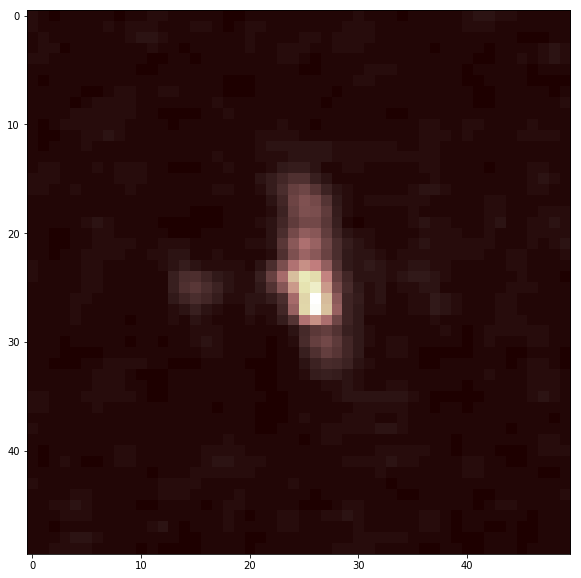

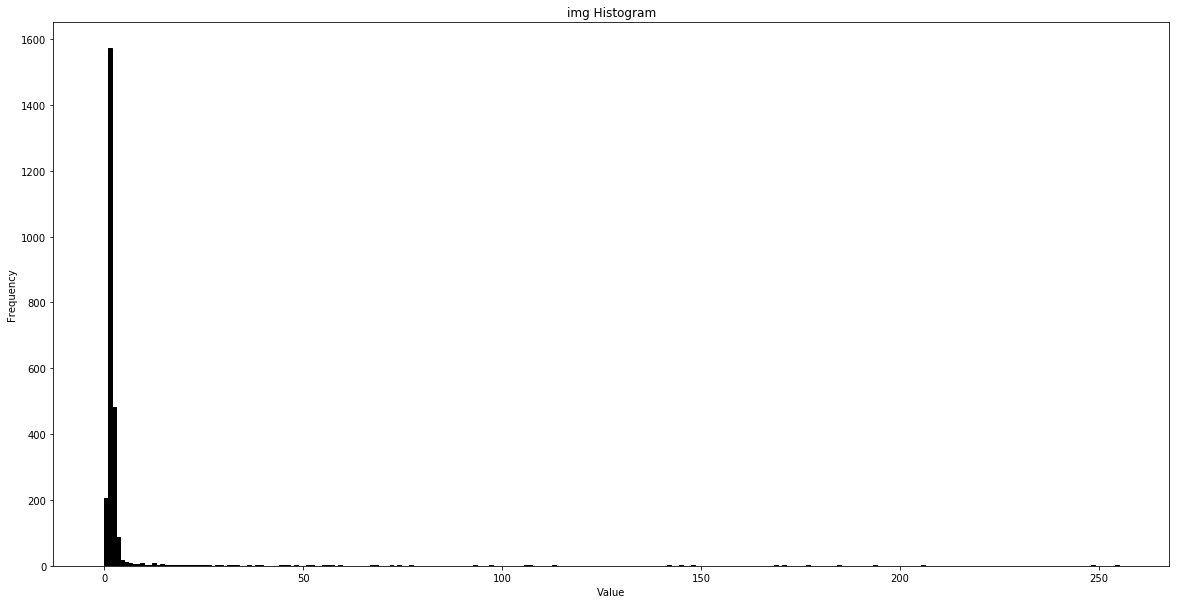

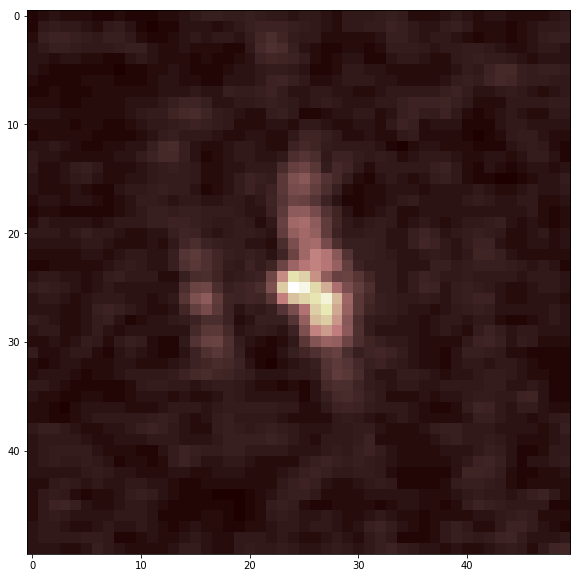

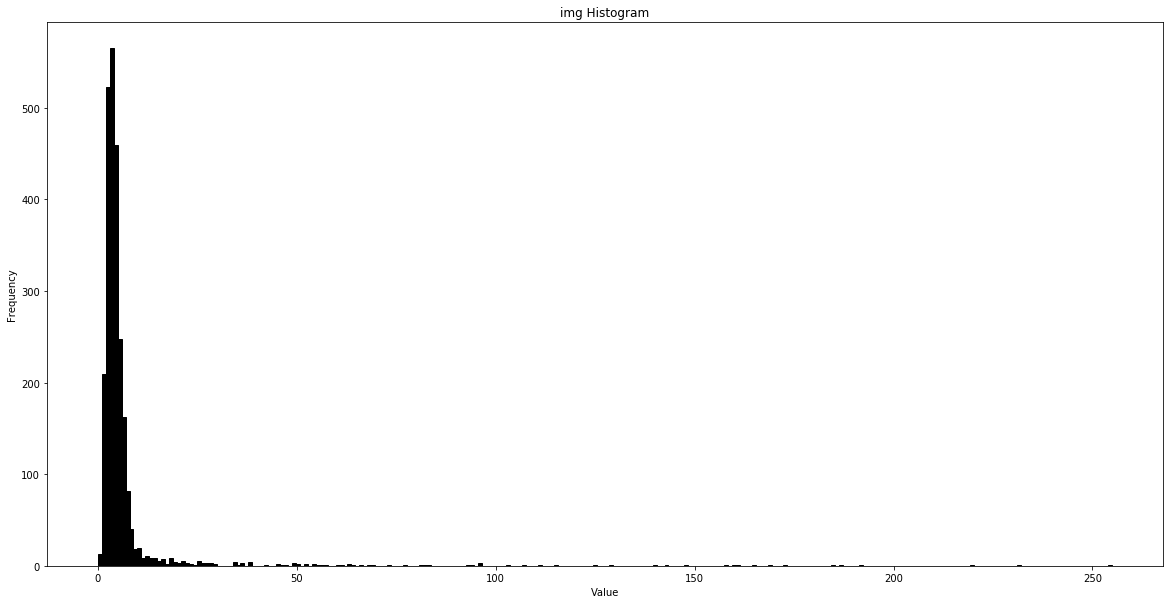

In [483]:
im = False
for id_no in list_of_blob_ids:
    if im == False:
        correct = array_of_50x50_crops[id_no]
        im == True
    image_crop = array_of_50x50_crops[id_no]
    plt.imshow(image_crop, cmap='pink')
    plt.show()
    plt.hist(image_crop.flatten(), 256, range=(0, 255), fc='k', ec='k')
    plt.title("img Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    

In [323]:
pred_other_mask = df_only_turbines['50_class_key'] == 'other'
df_pred_other_actual_turbine = df_only_turbines[pred_other_mask]

In [324]:
high_other_pred_mask = df_pred_other_actual_turbine['50_class_value'] > 0.99
df_strong_pred_other_actual_turbine = df_pred_other_actual_turbine[high_other_pred_mask]

# Incorrectly predicted turbines

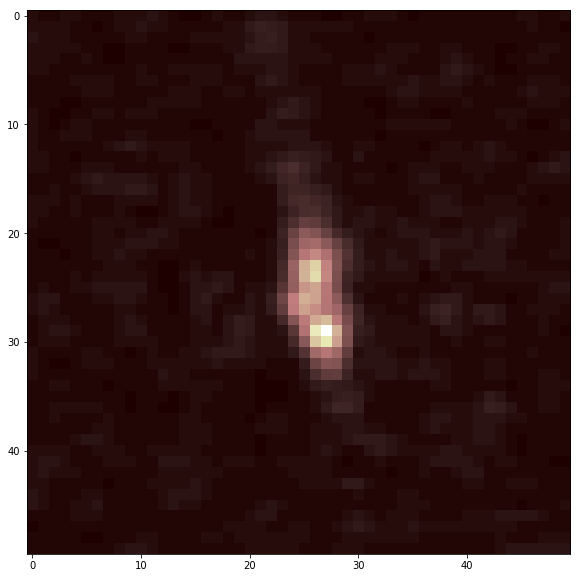

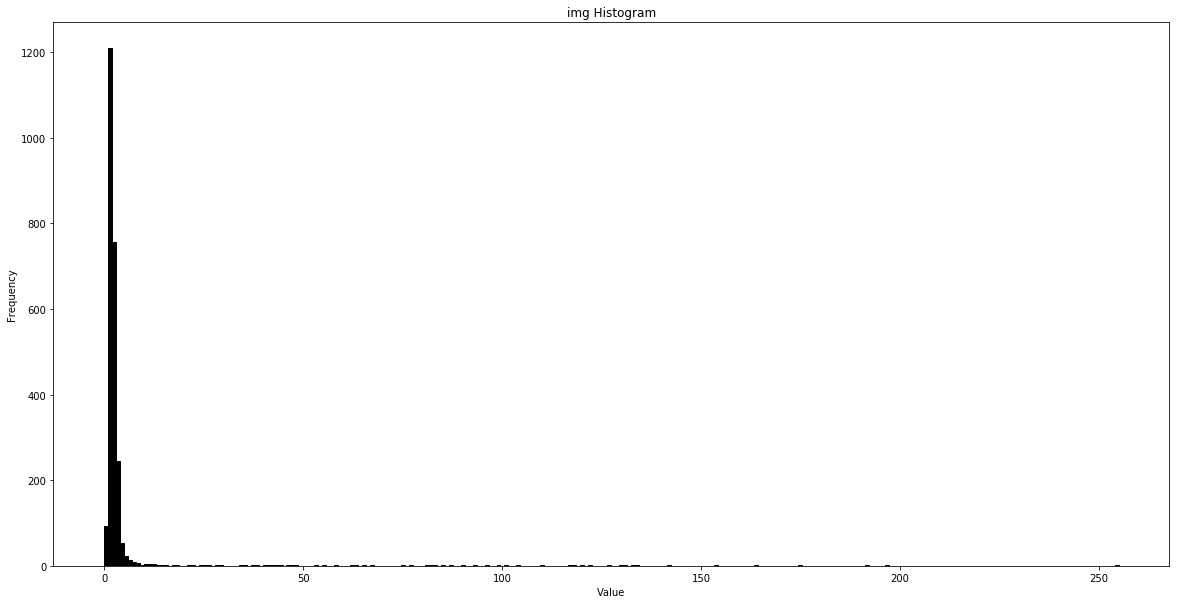

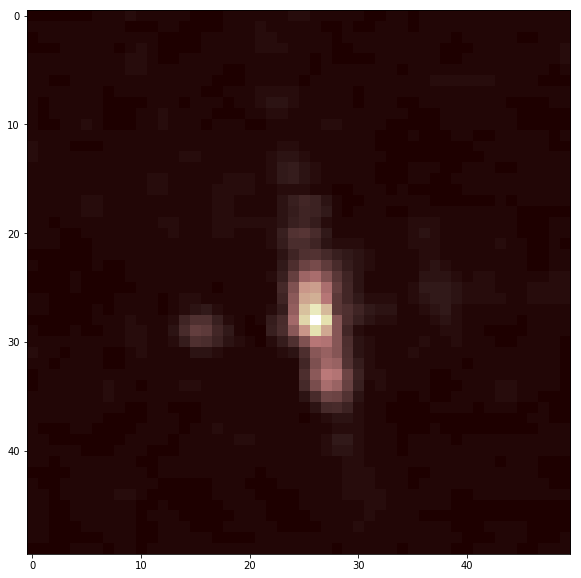

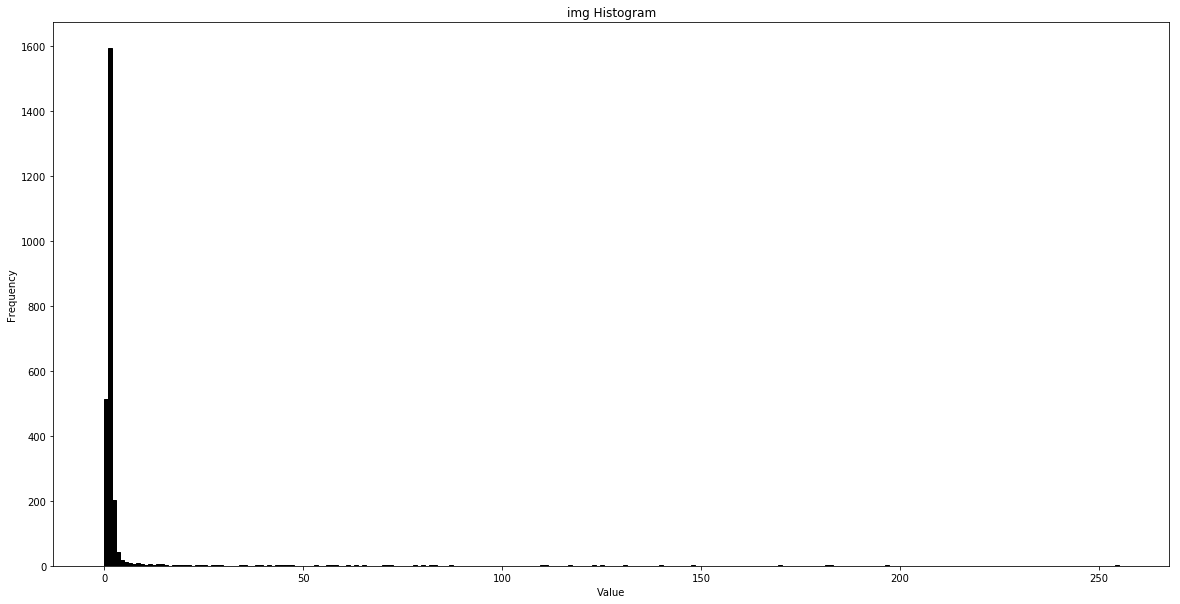

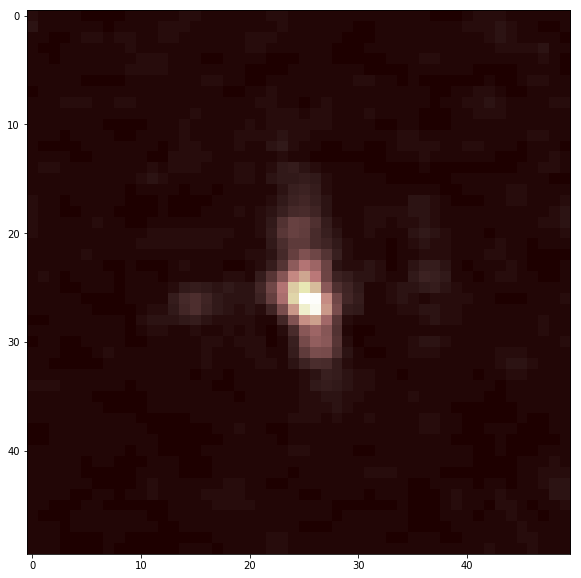

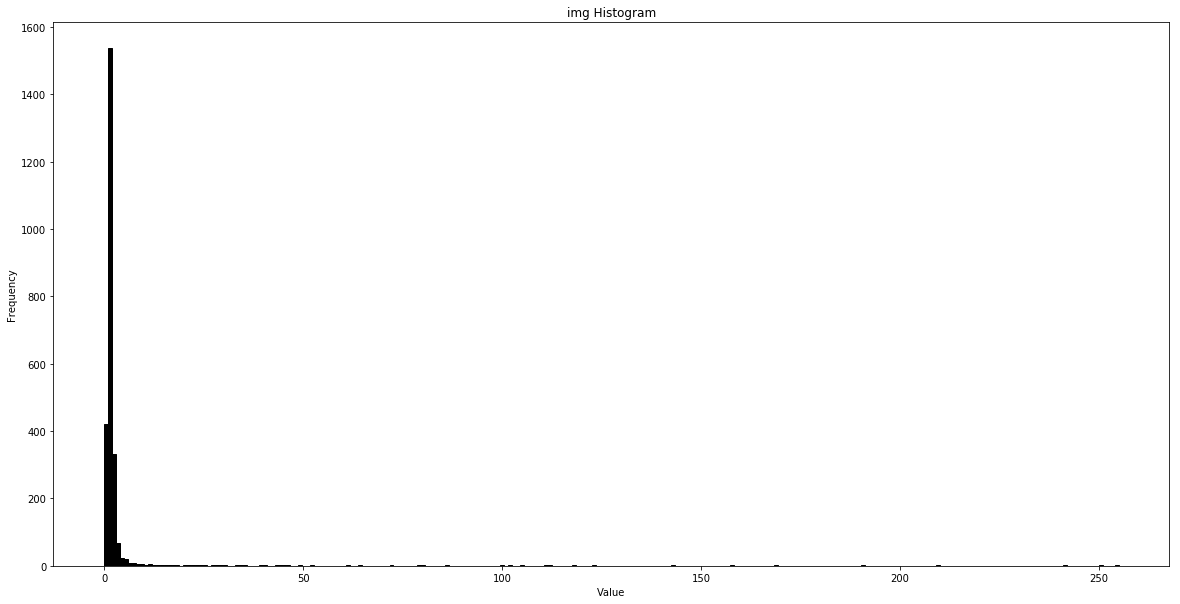

In [484]:
strong_other_blob_ids = df_strong_pred_other_actual_turbine['blob_id'].tolist()
im = False
for id_no in strong_other_blob_ids:
    if im == False:
        incorrect = array_of_50x50_crops[id_no]
        im == True
    image_crop = array_of_50x50_crops[id_no]
    plt.imshow(image_crop, cmap='pink')
    plt.show()
    plt.hist(image_crop.flatten(), 256, range=(0, 255), fc='k', ec='k')
    plt.title("img Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [347]:
high_point_five_pred_mask = (df_pred_other_actual_turbine['50_class_value'] > 0.45) & (df_pred_other_actual_turbine['50_class_value'] < 0.65)
df_strong_pred_other_actual_turbine = df_pred_other_actual_turbine[high_point_five_pred_mask]

In [348]:
df_strong_pred_other_actual_turbine

image_id  blob_id   latitude  \
76  S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...       76  34.428018   
93  S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...       93  34.484163   
94  S1A_IW_GRDH_1SDV_20170924T100355_20170924T1004...       94  34.485421   

     longitude persists  distance                       50_class  \
76  120.181996  [1,1,1]  5.445544   {"other": 0.642187774181366}   
93  120.122707  [1,1,1]  8.582983  {"other": 0.6257373094558716}   
94  120.119204  [1,1,1]  8.446254  {"other": 0.5229508876800537}   

                          140_class                        240_class  \
76    {"other": 0.9969995021820068}    {"other": 0.9988632202148438}   
93    {"other": 0.8738827109336853}  {"turbine": 0.5948132872581482}   
94  {"turbine": 0.9684468507766724}    {"other": 0.9960427284240723}   

            datetime                                   class_idx  \
76  2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   
93  2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   
94  2017-12-05 10:23  [oil_and_gas_infrastructure,turbine,other]   

                                              50_prob  \
76  [6.425405445042998e-05,0.3577479422092438,0.64...   
93  [0.00013906968524679542,0.3741236627101898,0.6...   
94  [0.0005112172802910209,0.47653788328170776,0.5...   

                                             140_prob  \
76  [8.078297923930222e-07,0.0029997508972883224,0...   
93  [2.580281659447792e-07,0.1261170506477356,0.87...   
94  [2.0390093169453394e-08,0.9684468507766724,0.0...   

                                             240_prob   Actual  \
76  [3.33534799779045e-09,0.001136784441769123,0.9...  Turbine   
93  [3.860325687582433e-13,0.5948132872581482,0.40...  Turbine   
94  [7.396576976121186e-14,0.003957275301218033,0....  Turbine   

                                       geometry 50_class_key  50_class_value  
76   POINT (120.181995954581 34.42801817118742)        other        0.642188  
93  POINT (120.1227071458291 34.48416287644489)        other        0.625737  
94   POINT (120.119203716221 34.48542051784266)        other        0.522951

# On The Fence Turbines

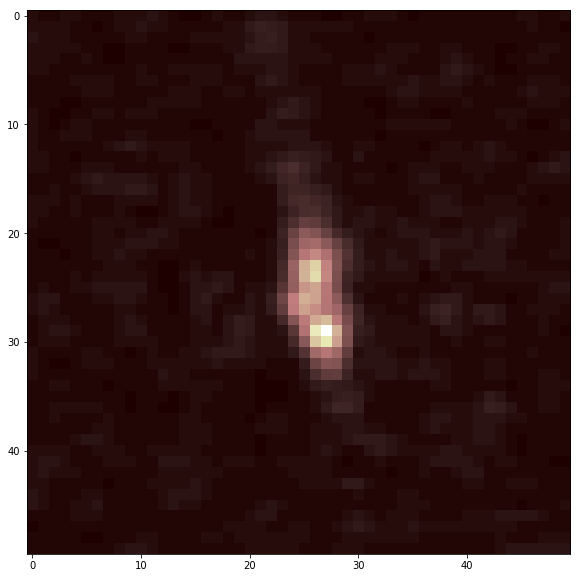

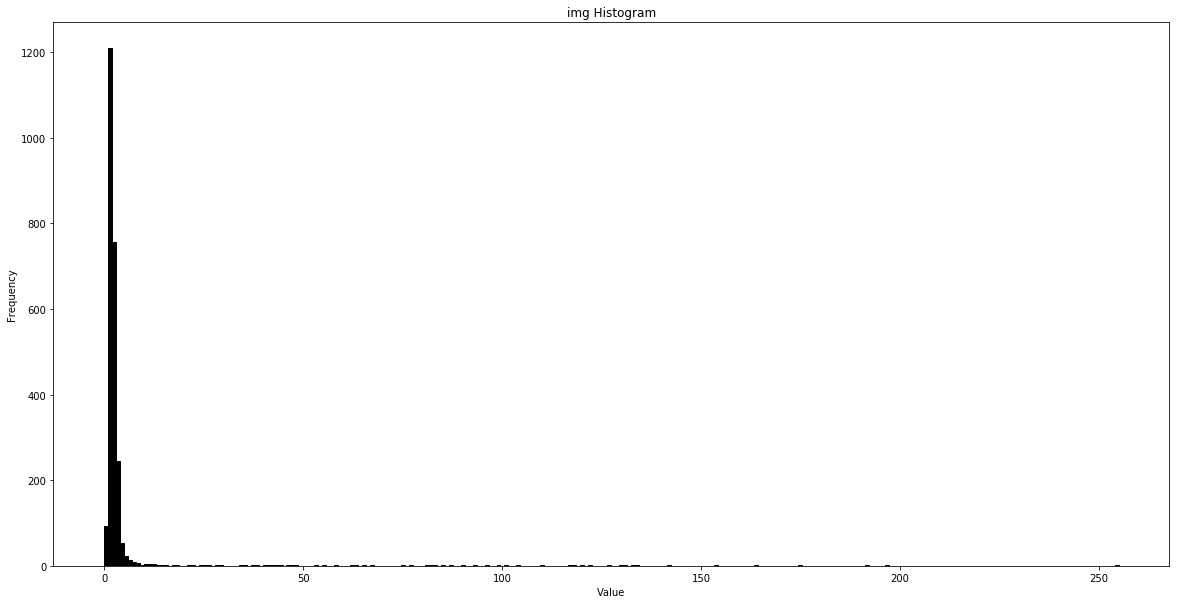

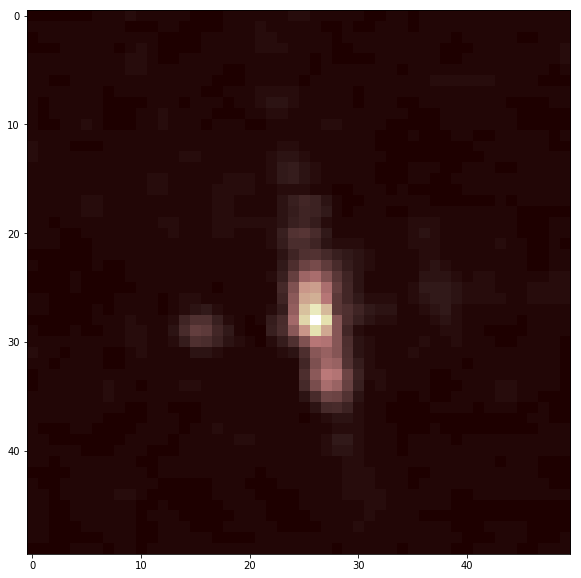

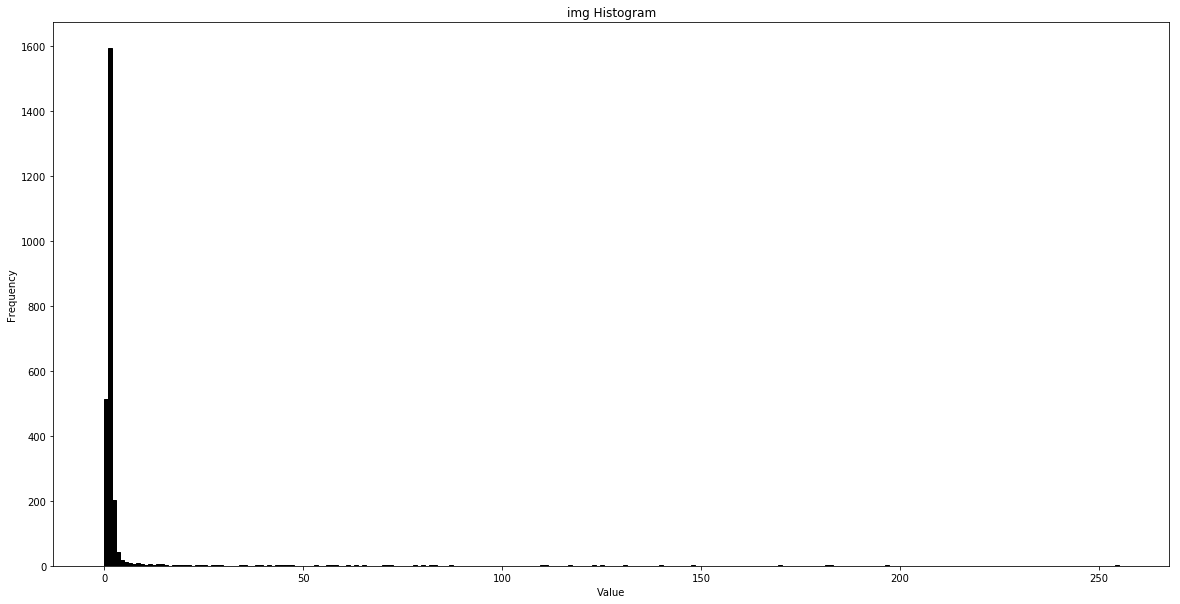

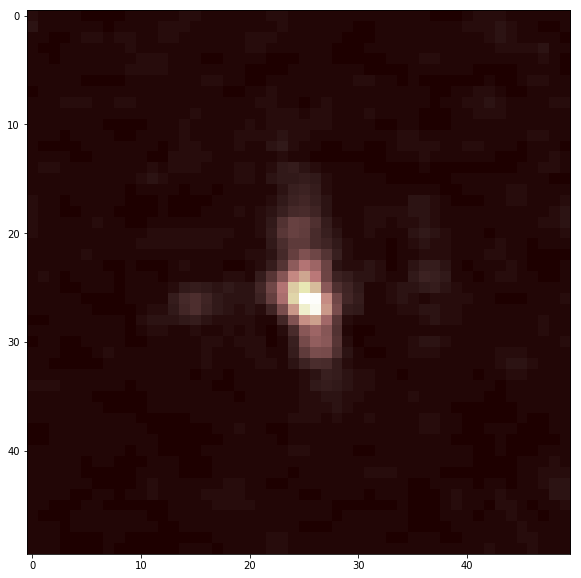

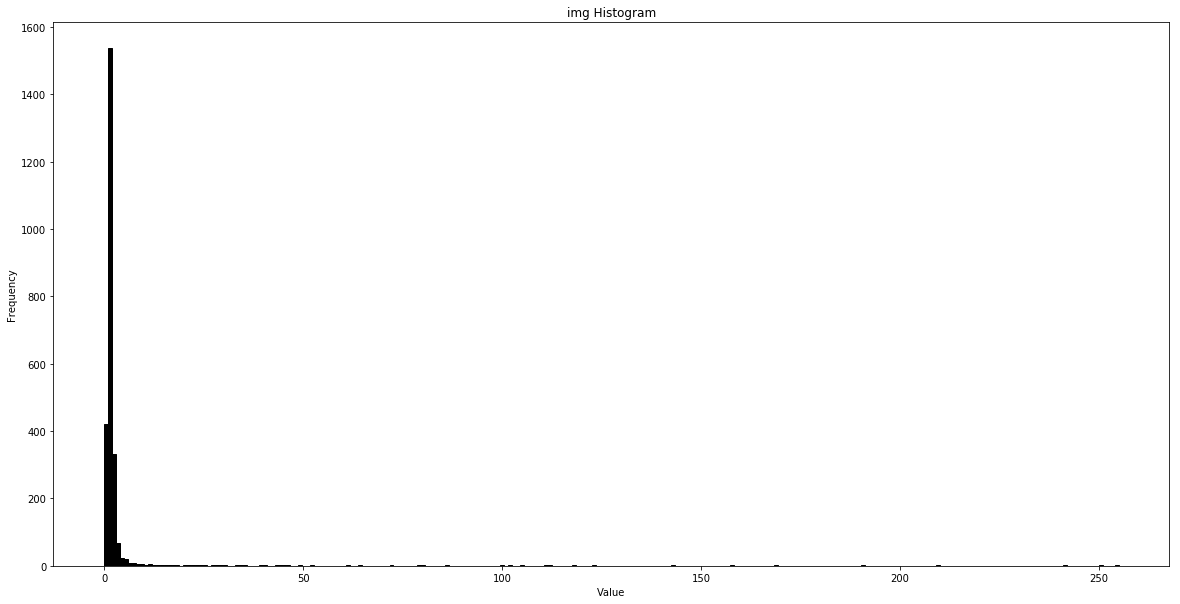

In [485]:
point_five_other_blob_ids = df_strong_pred_other_actual_turbine['blob_id'].tolist()
im = False
for id_no in point_five_other_blob_ids:
    if im == False:
        on_fence  = array_of_50x50_crops[id_no]
        im == True
    image_crop = array_of_50x50_crops[id_no]
    plt.imshow(image_crop, cmap='pink')
    plt.show()
    plt.hist(image_crop.flatten(), 256, range=(0, 255), fc='k', ec='k')
    plt.title("img Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

# Compare and contrast correct and incorrectly predicted images

In [400]:
print(correct.shape)
print(incorrect.shape)
print(on_fence.shape)

(50, 50)
(50, 50)
(50, 50)


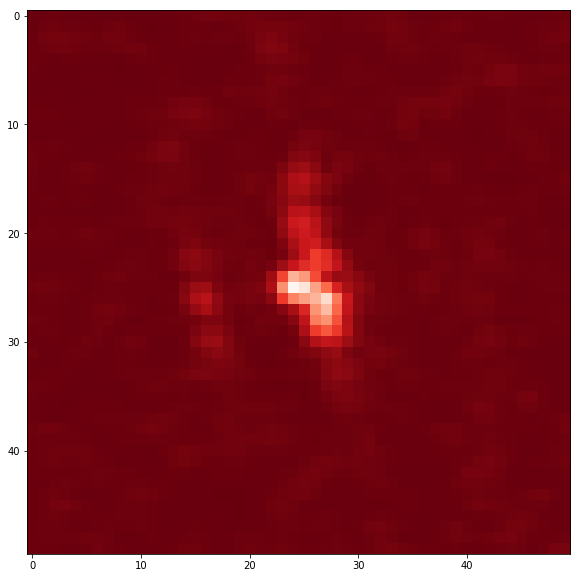

In [401]:
plt.imshow(correct, cmap='Reds_r')
plt.show()

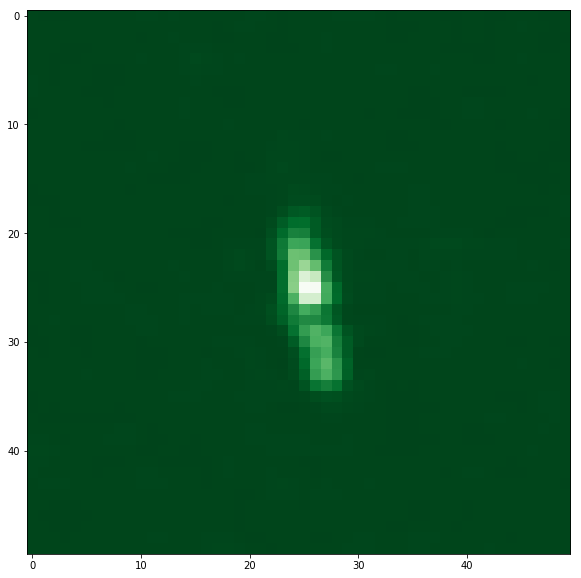

In [402]:
plt.imshow(incorrect, cmap='Greens_r')
plt.show()

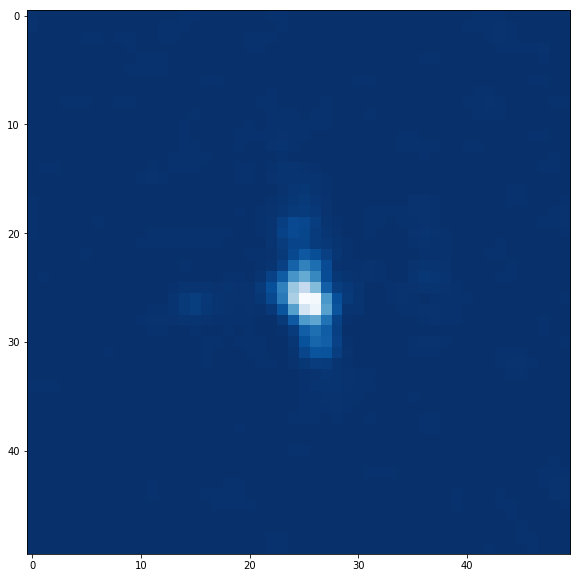

In [403]:
plt.imshow(on_fence, cmap='Blues_r')
plt.show()

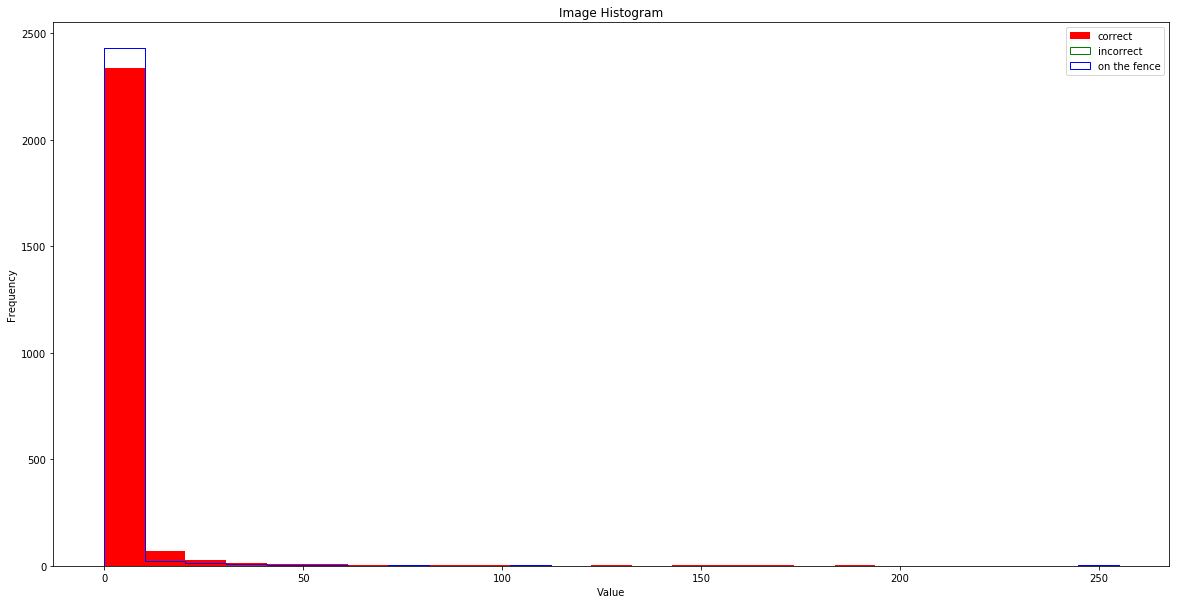

In [486]:
    colors = ['red', 'green', 'blue']
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 10
    plt.hist(correct.flatten(), 25, range=(0, 255),histtype='bar', fill=True, color='red', label='correct')
    plt.hist(incorrect.flatten(), 25, range=(0, 255), histtype='step', fill=False, color='green', label='incorrect')
    plt.hist(on_fence.flatten(), 25, range=(0, 255), histtype='step', fill=False, color='blue', label='on the fence')
    plt.title("Image Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

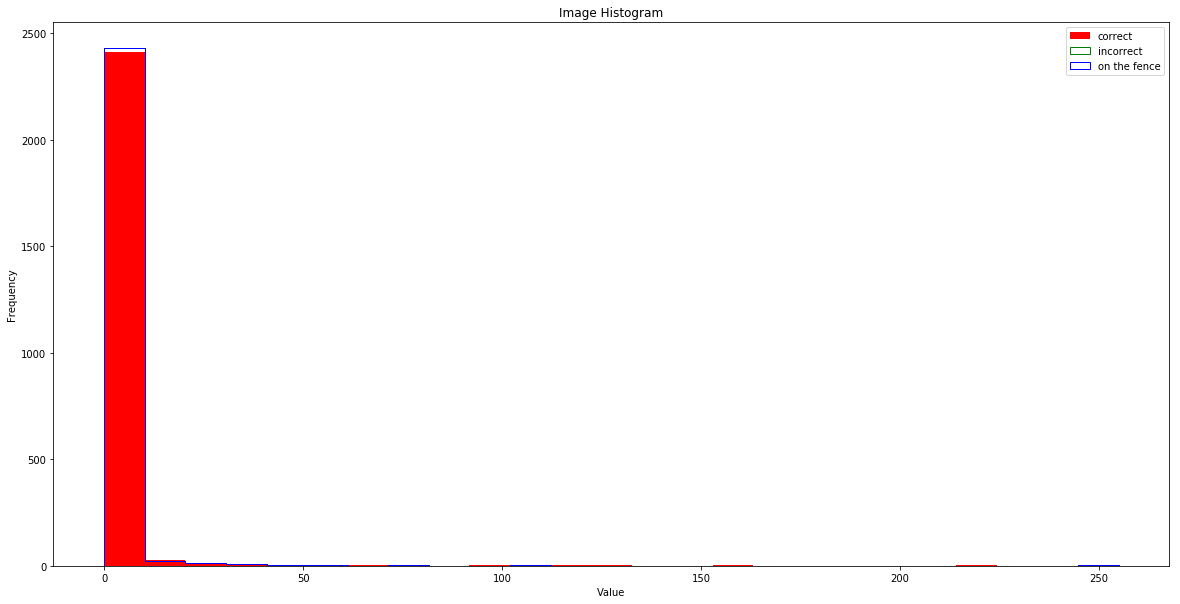

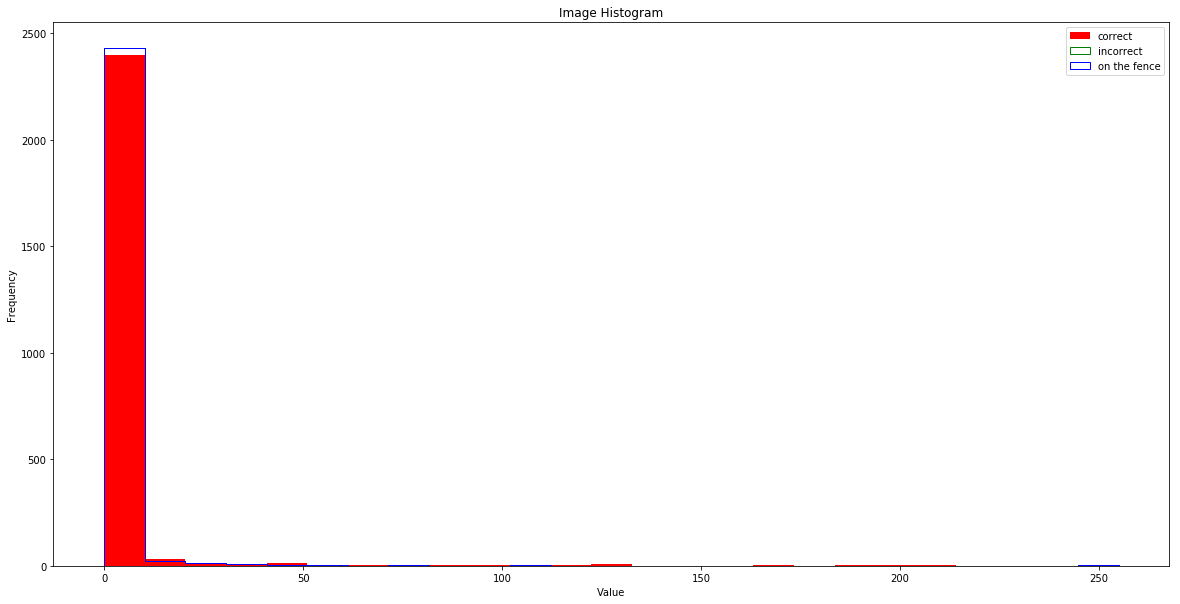

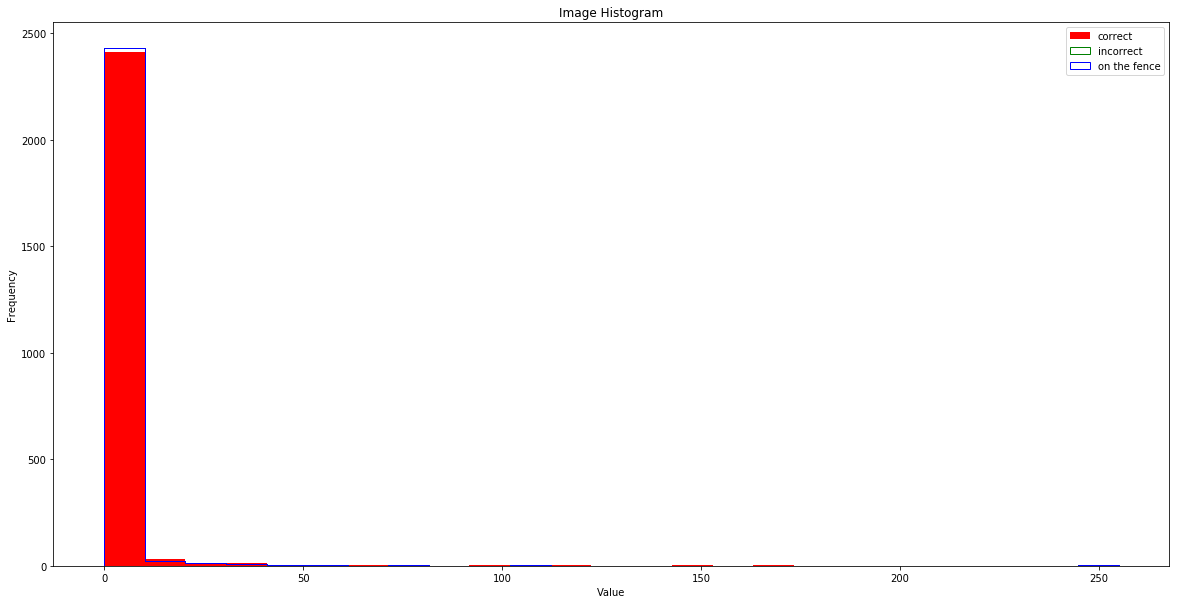

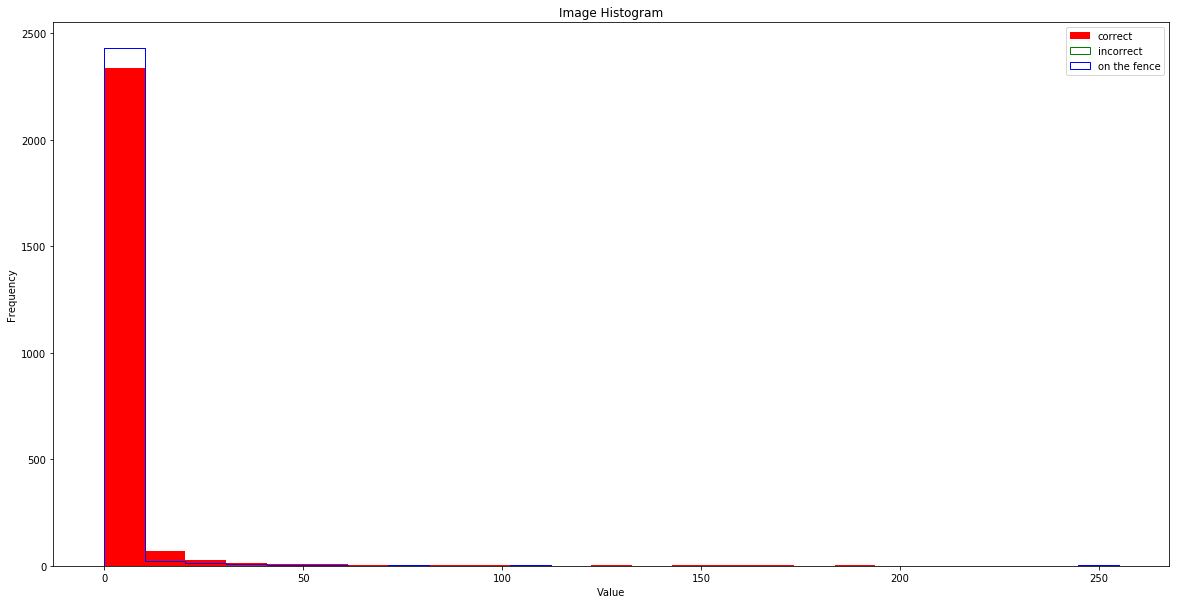

In [488]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
for n in list_of_blob_ids:
    plt.hist(array_of_50x50_crops[n].flatten(), 25, range=(0, 255),histtype='bar', fill=True, color='red', label='correct')
    plt.hist(incorrect.flatten(), 25, range=(0, 255), histtype='step', fill=False, color='green', label='incorrect')
    plt.hist(on_fence.flatten(), 25, range=(0, 255), histtype='step', fill=False, color='blue', label='on the fence')
    plt.title("Image Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Issue seems to be with dark areas, low pixel values, let's look at the pixels values in the range 0 - 25. Loop through all correct and incorrect classifications

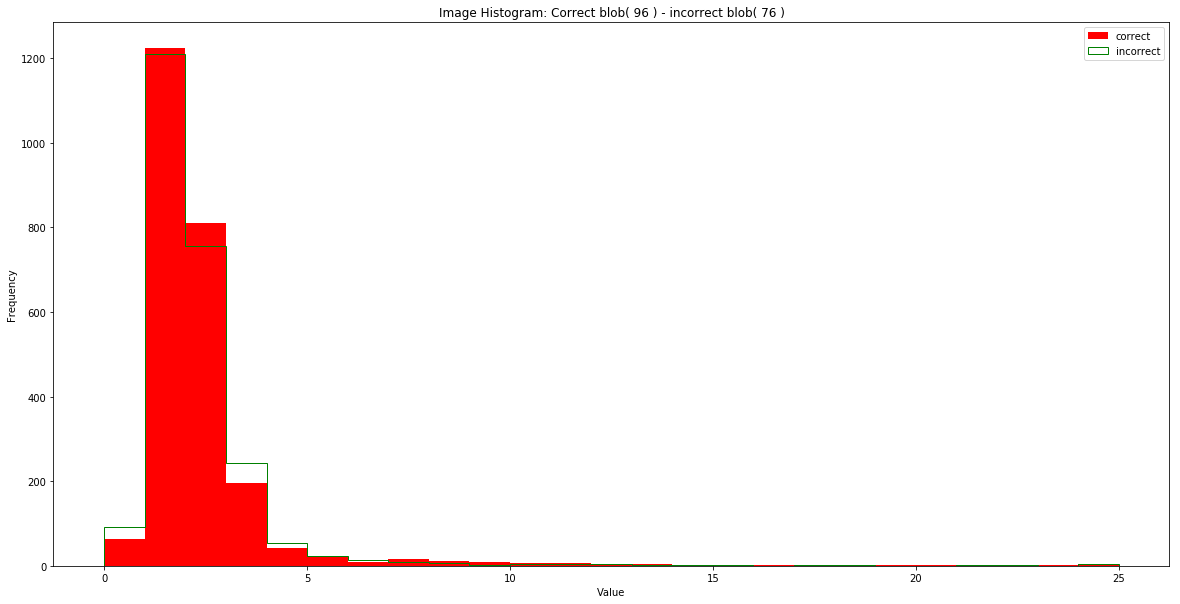

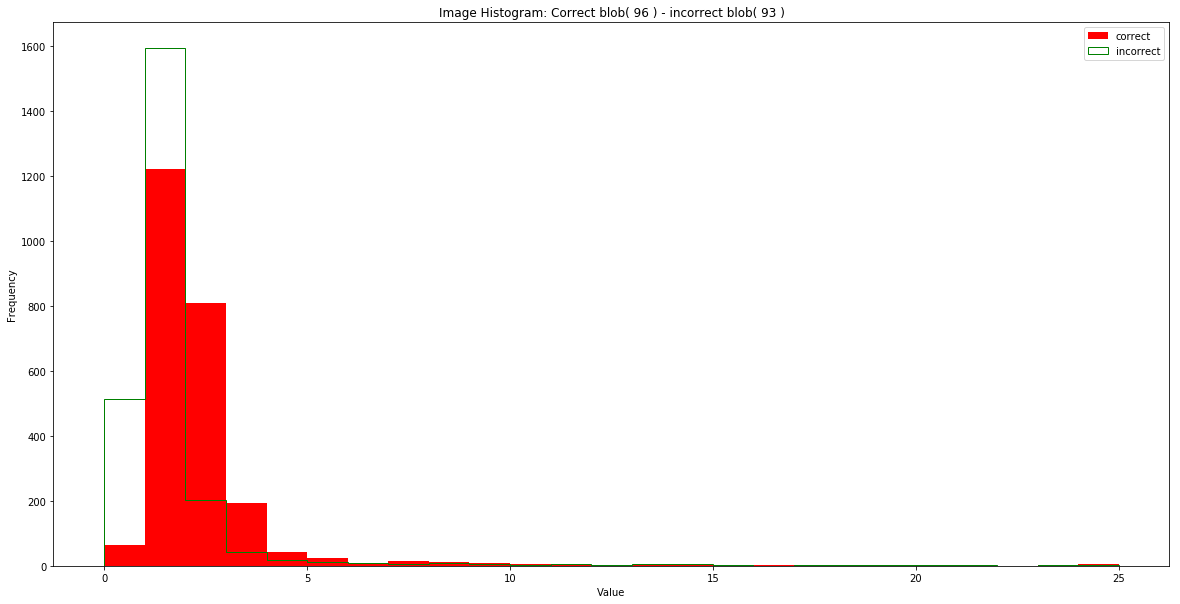

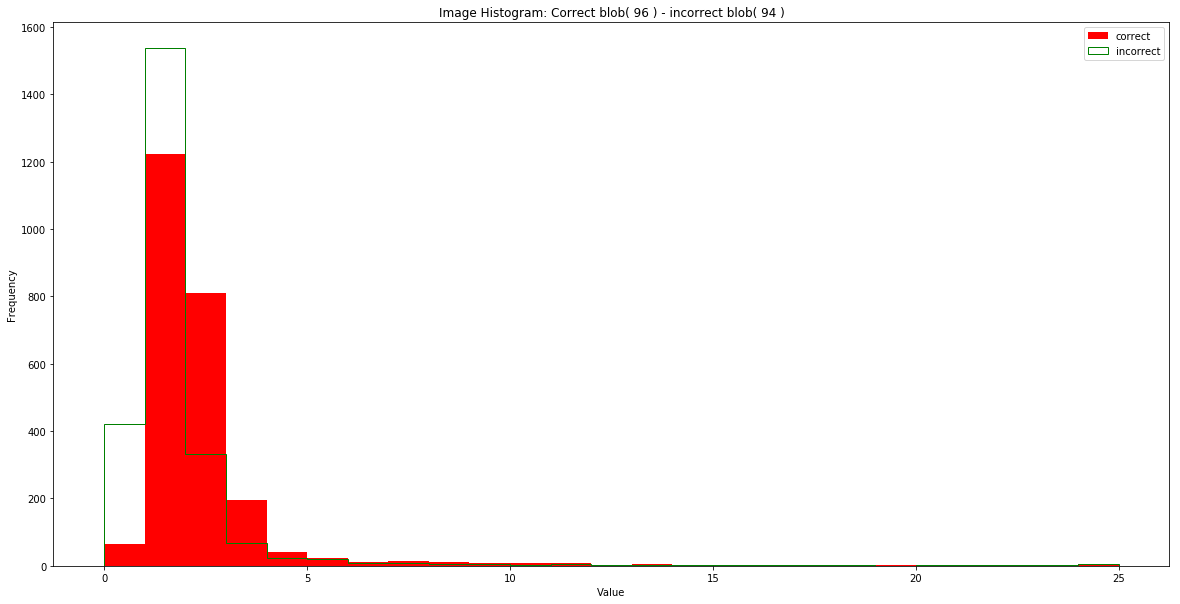

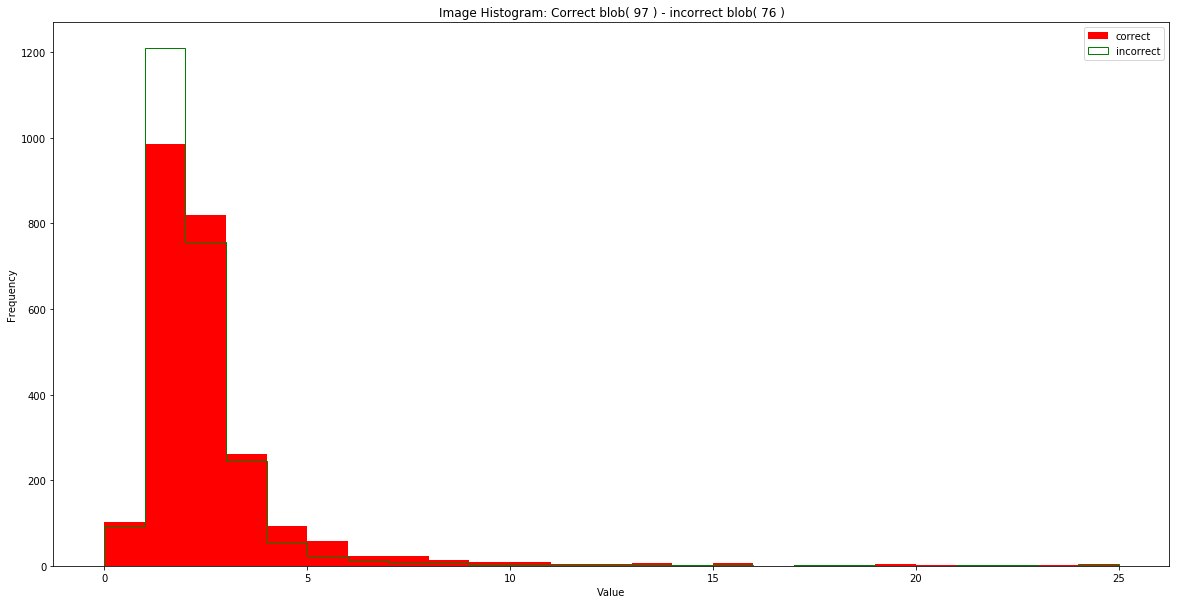

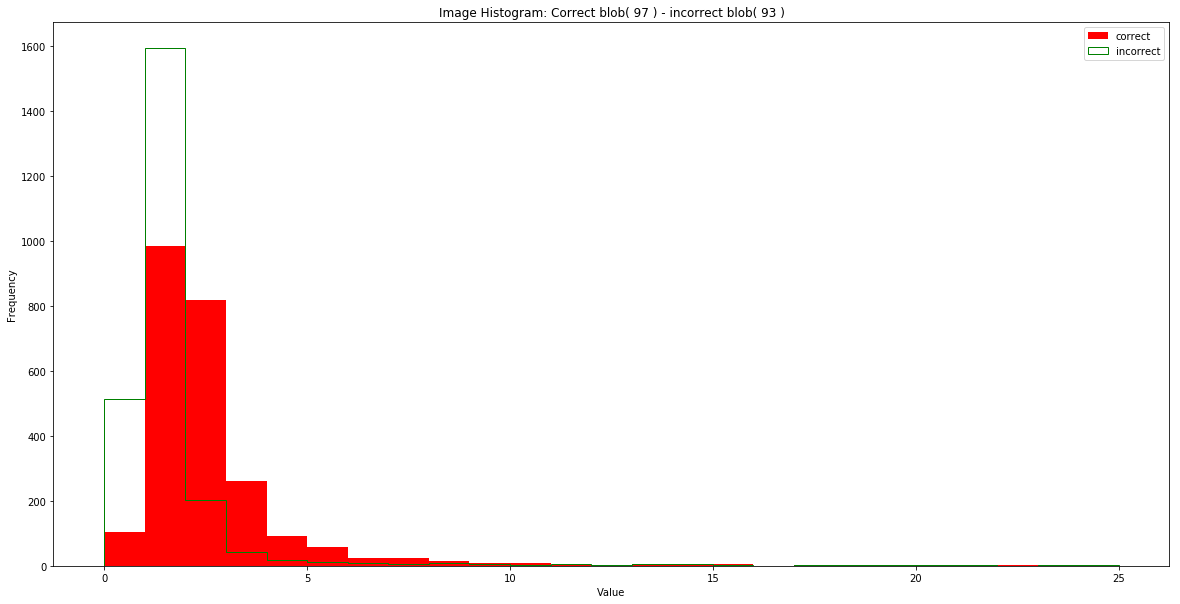

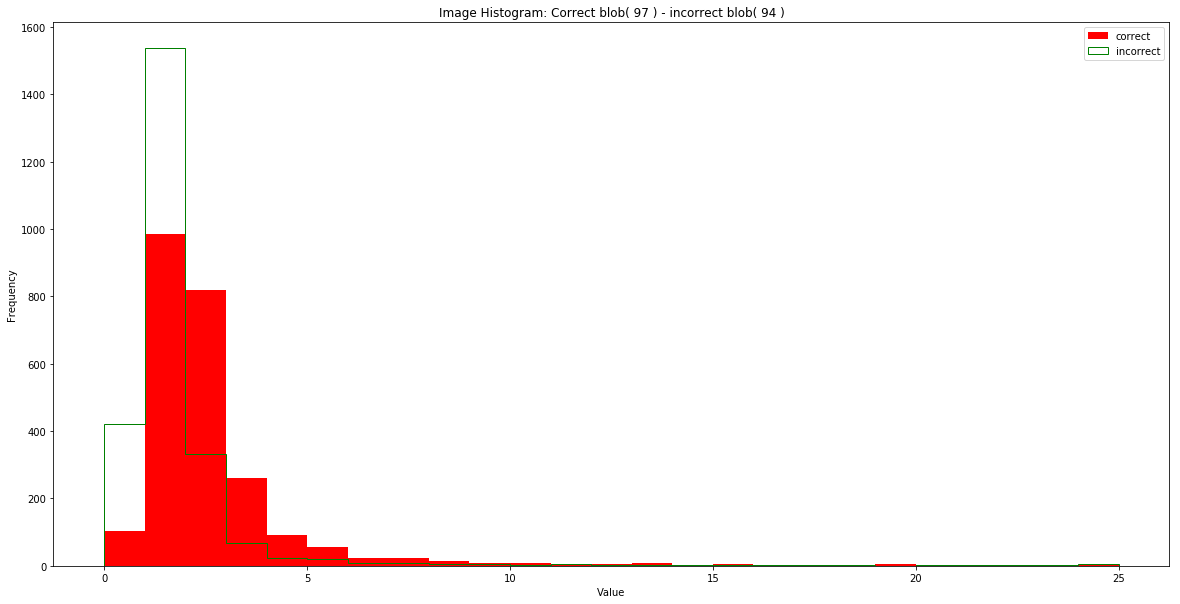

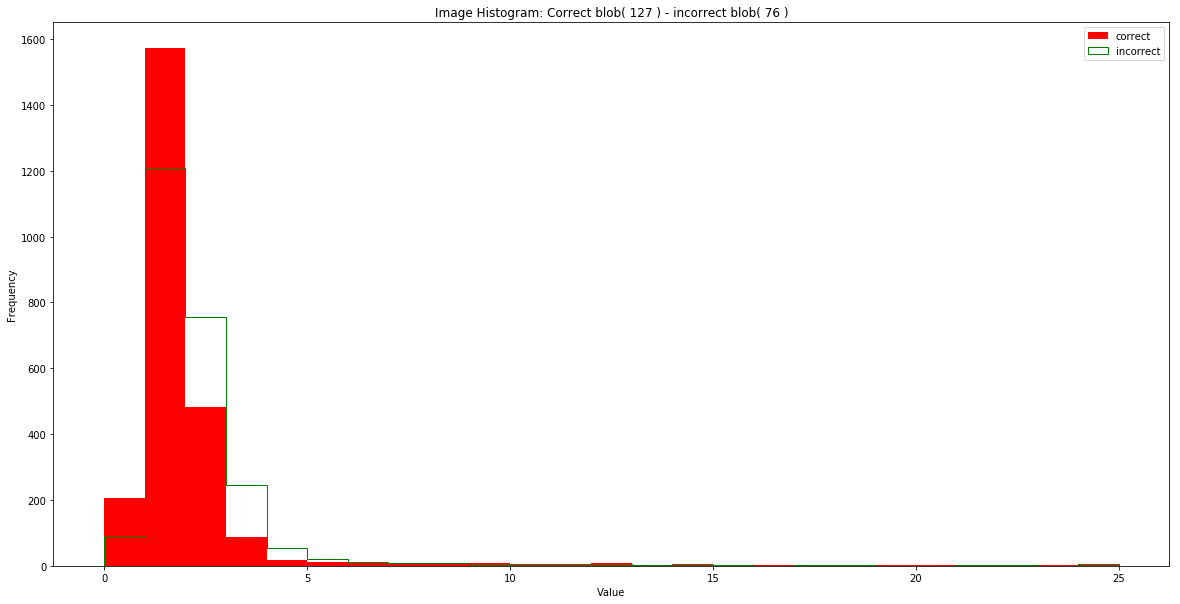

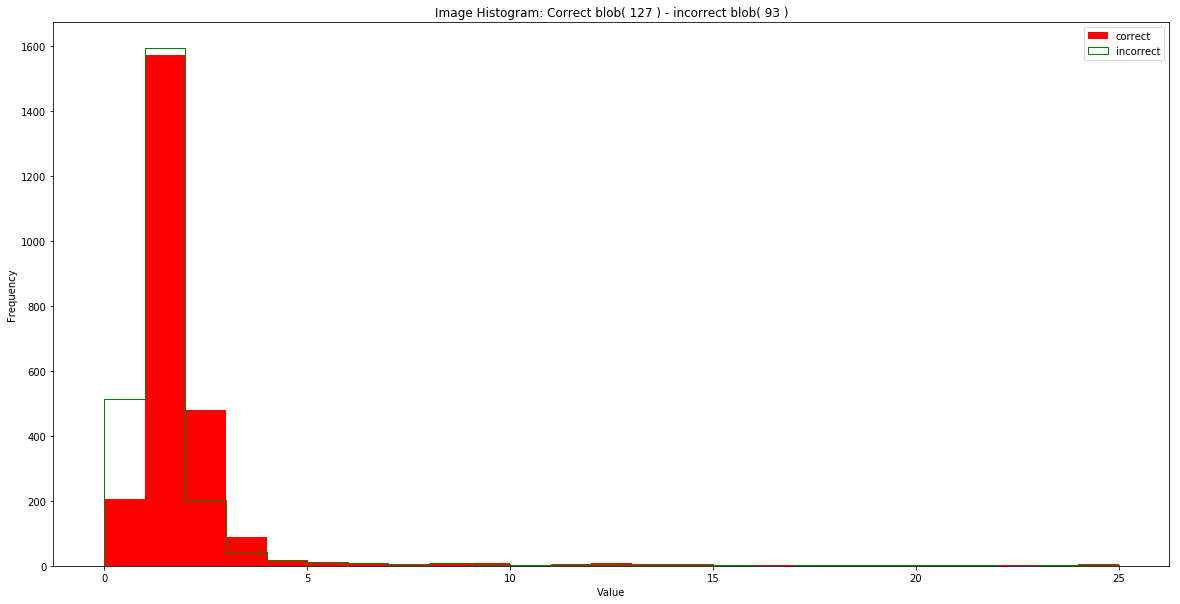

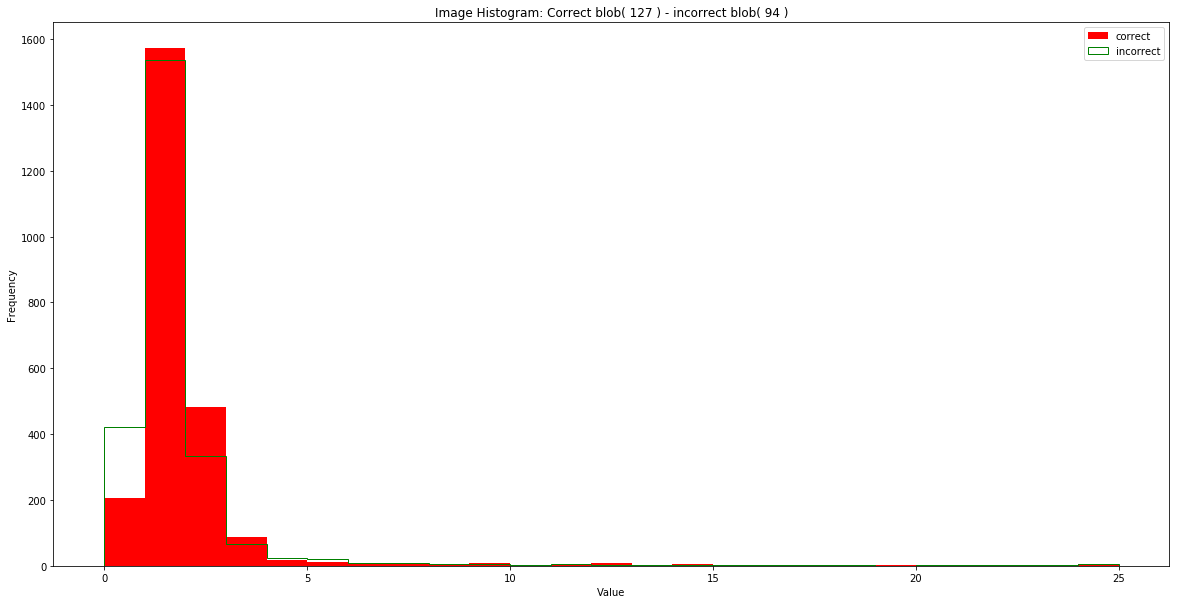

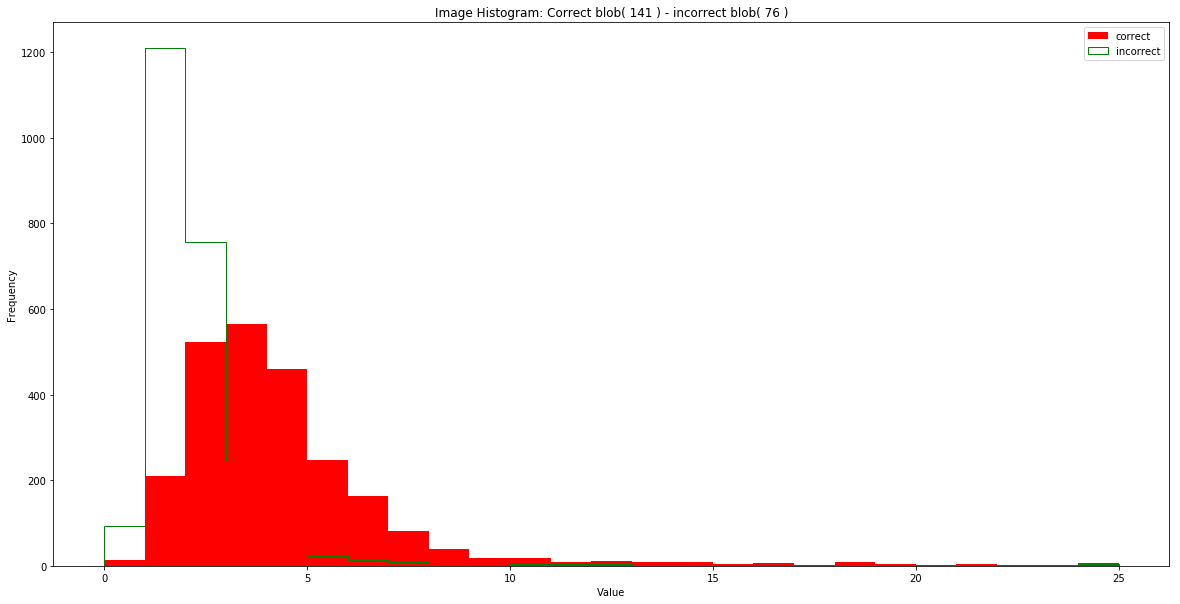

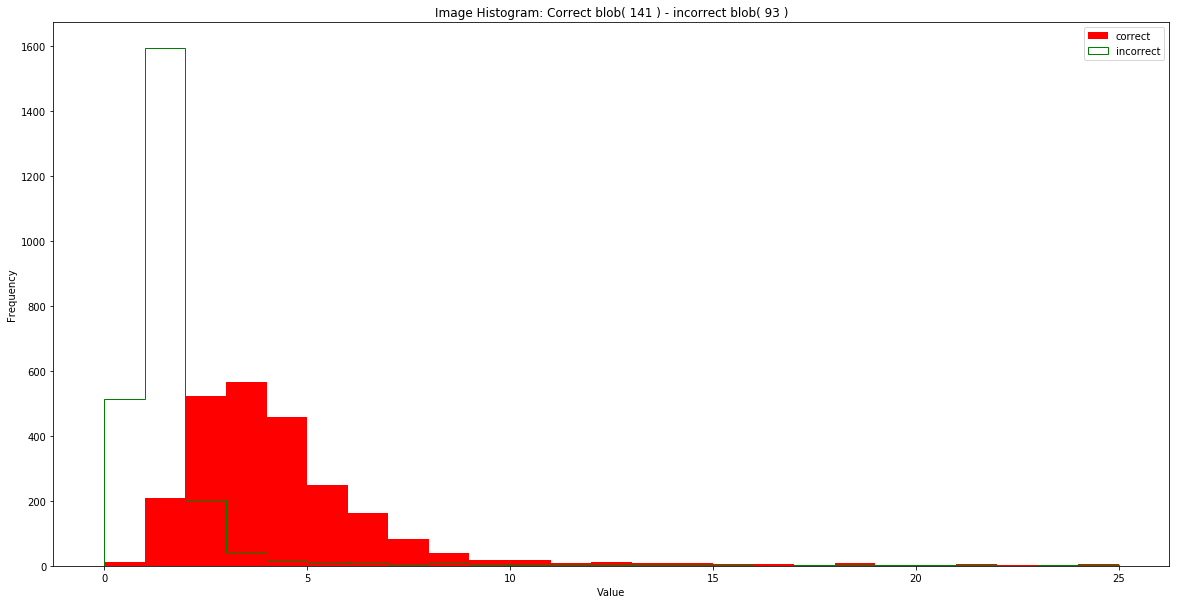

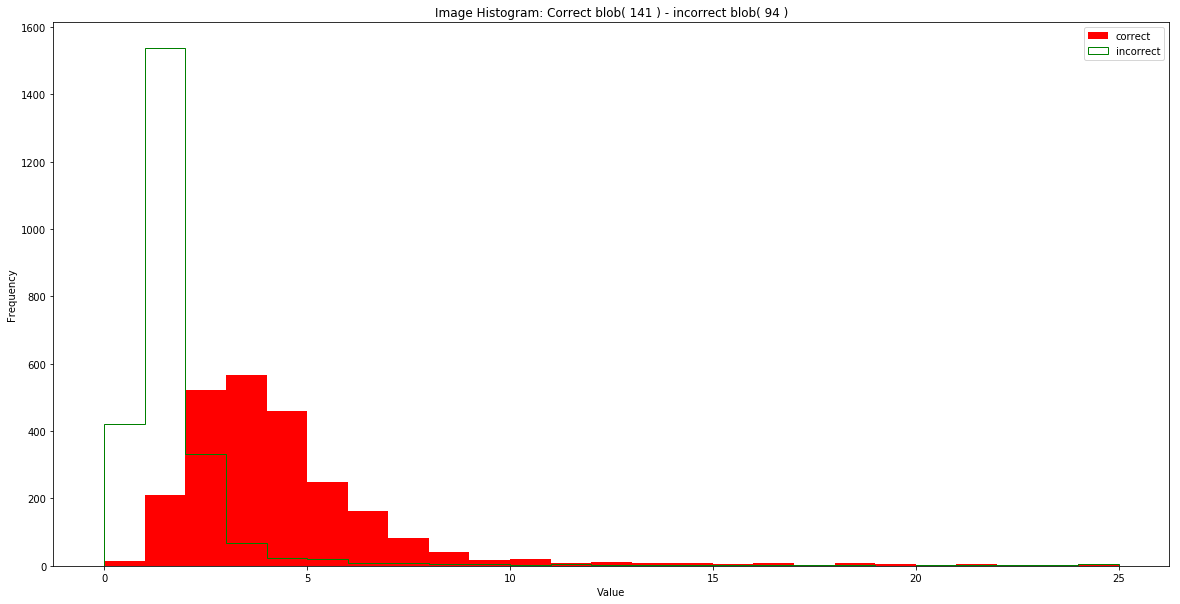

In [491]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
for x in list_of_blob_ids:
    for n in strong_other_blob_ids:
        plt.hist(array_of_50x50_crops[x].flatten(), 25, range=(0, 25),histtype='bar', fill=True, color='red', label='correct')
        plt.hist(array_of_50x50_crops[n].flatten(), 25, range=(0, 25), histtype='step', fill=False, color='green', label='incorrect')
       # plt.hist(on_fence.flatten(), 25, range=(0, 25), histtype='step', fill=False, color='blue', label='on the fence')
        plt.title("Image Histogram: Correct blob( " + str(x) + " ) - incorrect blob( " + str(n) + " )")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# Some training images to compare

In [444]:
# up training pngs  
list_of_50x50_training_crops = []

for file in os.listdir(training_crops_dir):
    if file.endswith(".png"):
        image = scipy.misc.imread(os.path.join(training_crops_dir, file), 0)
        if image is not None:
            list_of_50x50_training_crops.append(image)
        else:
            print("Cannot open file: " + file_path)
        

array_of_50x50_training_crops = np.asarray(list_of_50x50_training_crops)

(6198, 50, 50)
6198
[715, 4524, 2392, 3573, 3141]


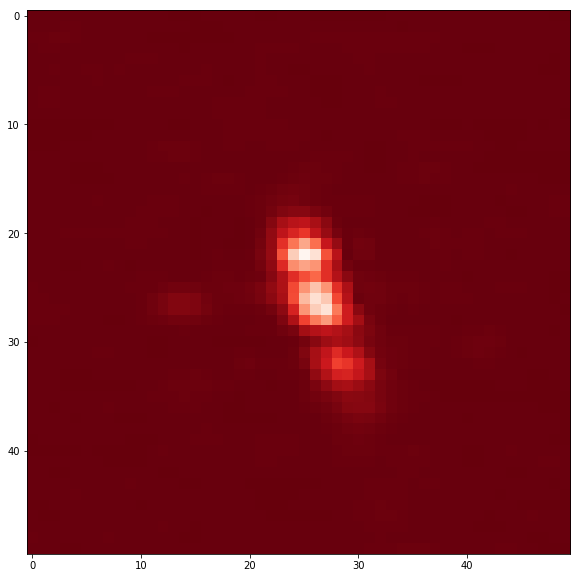

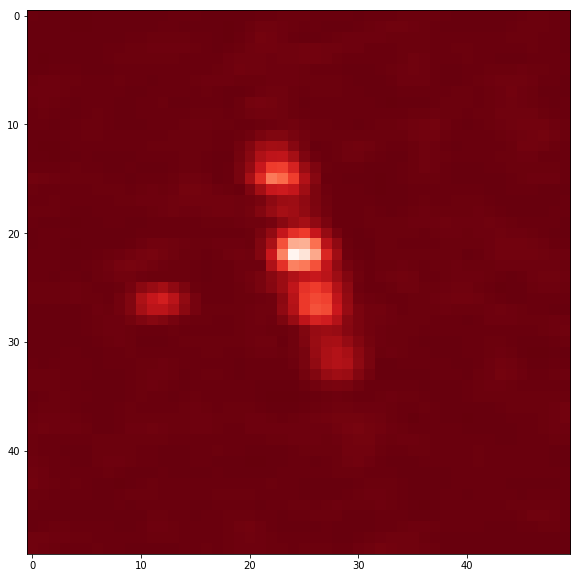

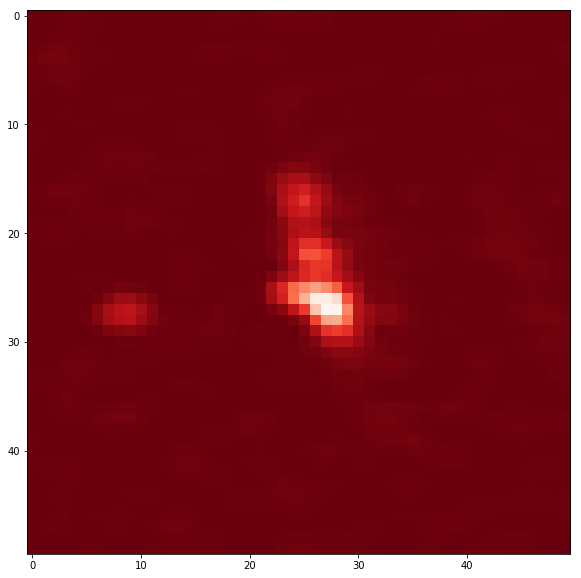

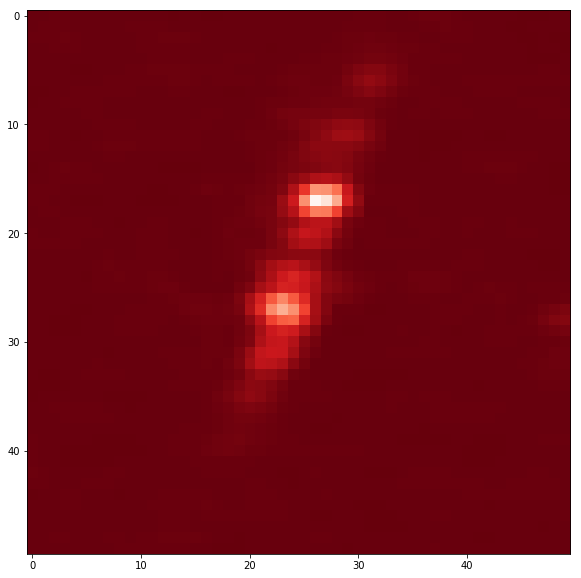

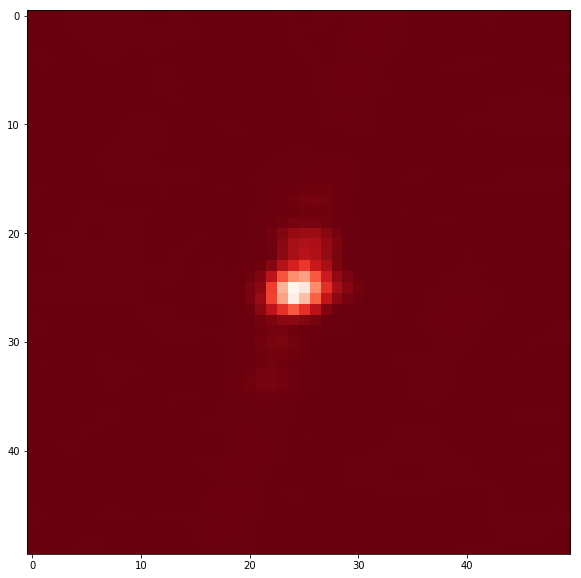

In [446]:
# display sample of the images the images 
num_images = array_of_50x50_training_crops.shape[0]
print(array_of_50x50_training_crops.shape)
print(num_images)
sample_list = random.sample(range(1, num_images), 5)
print(sample_list)

for id_no in sample_list:
    plt.imshow(array_of_50x50_training_crops[id_no], cmap='Reds_r')
    plt.show()



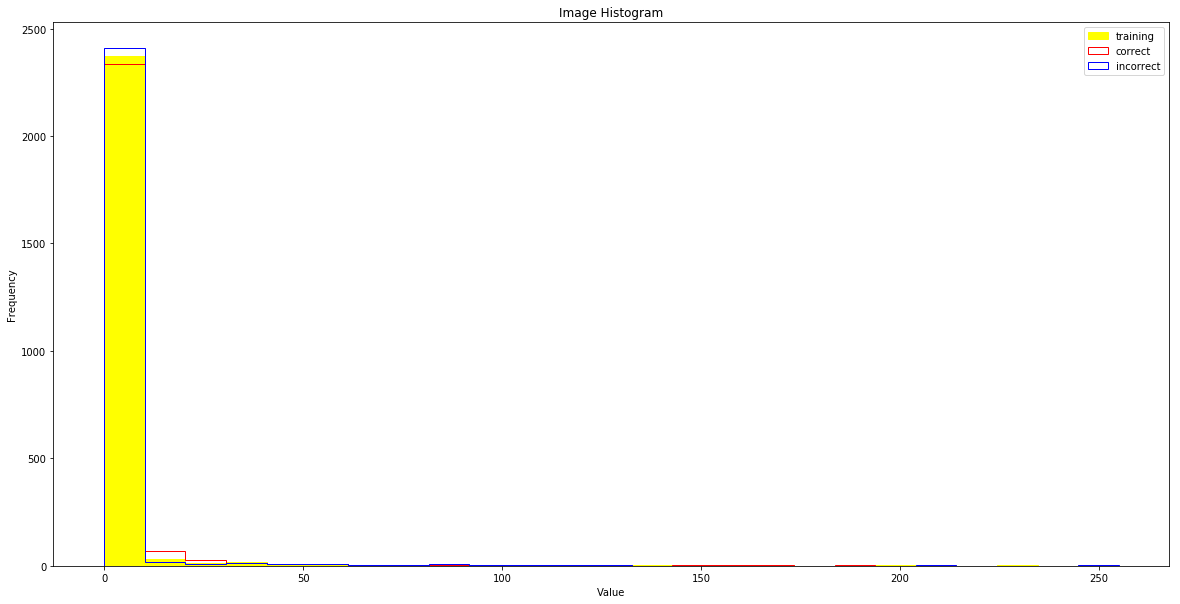

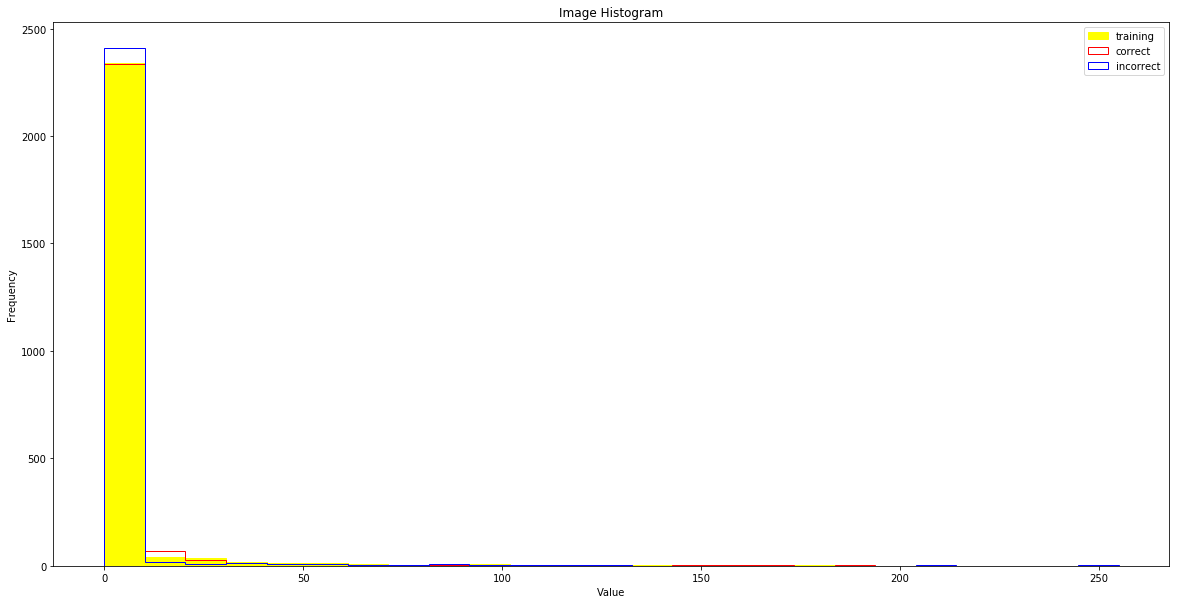

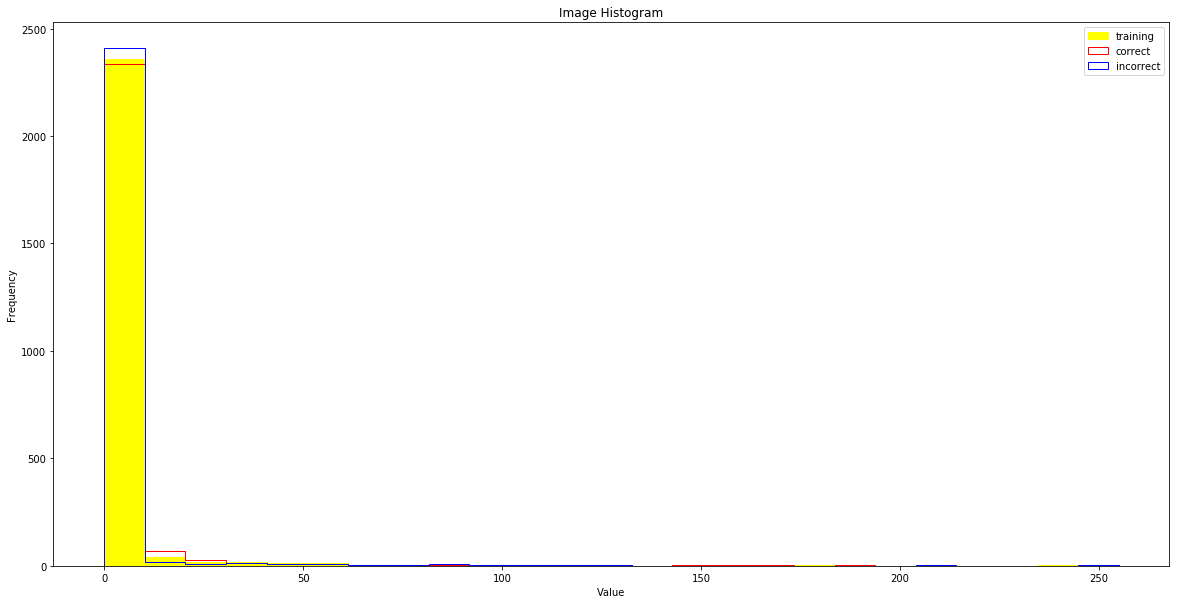

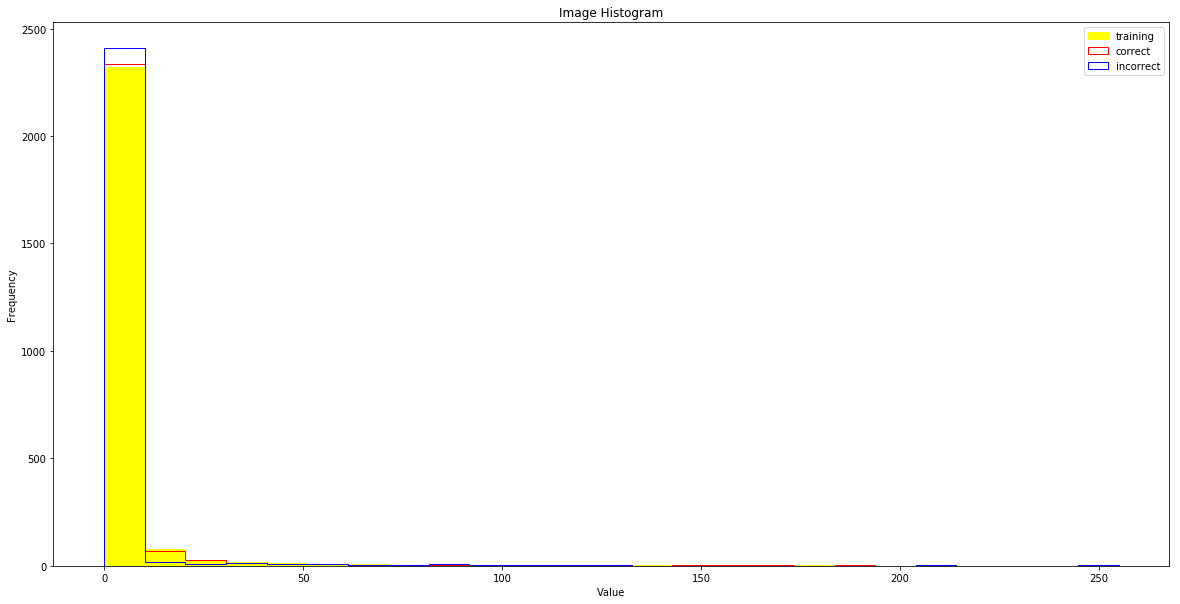

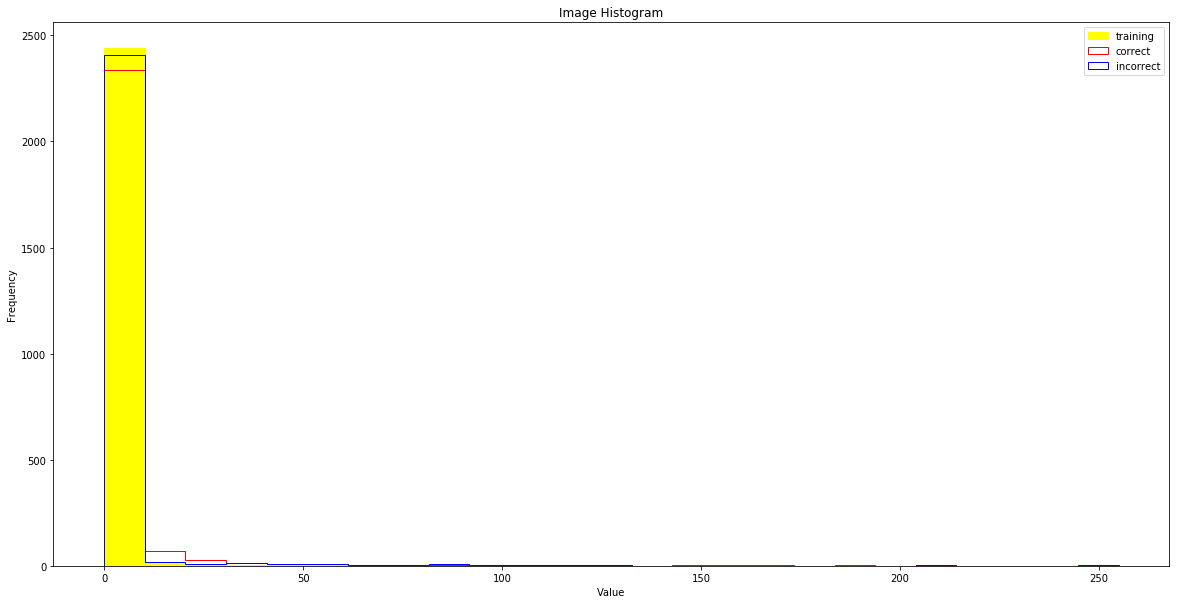

In [451]:
for id_no in sample_list:
    plt.hist(array_of_50x50_training_crops[id_no].flatten(), 25, range=(0, 255),histtype='step', fill=True, color='yellow', label='training')
    plt.hist(correct.flatten().flatten(), 25, range=(0, 255), histtype='step', fill=False, color='red', label='correct')
    plt.hist(incorrect.flatten(), 25, range=(0, 255), histtype='step', fill=False, color='blue', label='incorrect')
    plt.title("Image Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


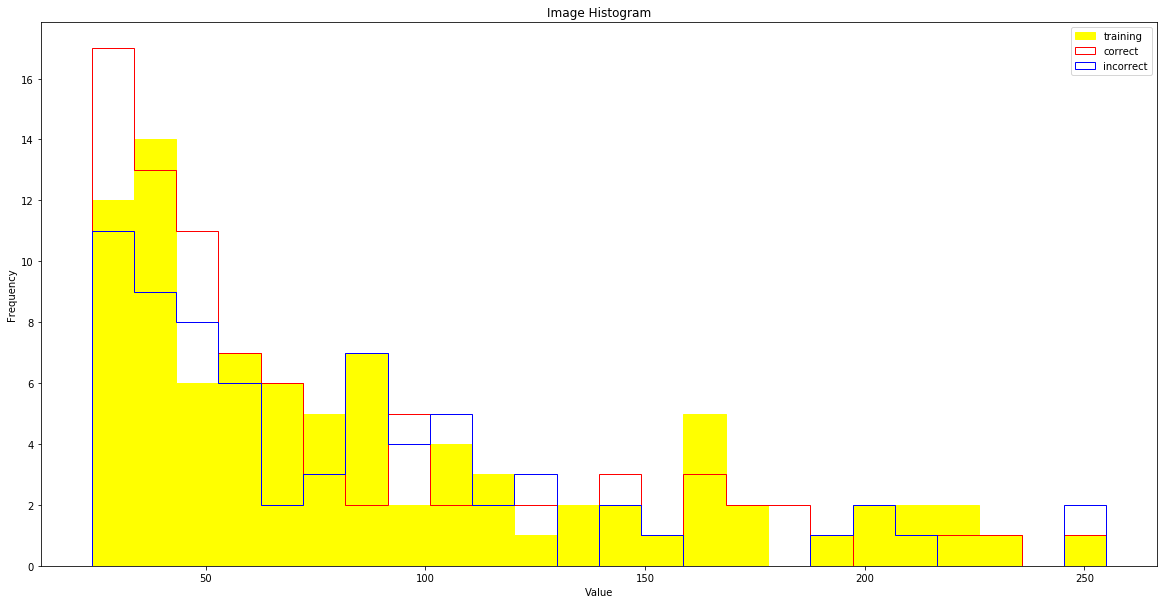

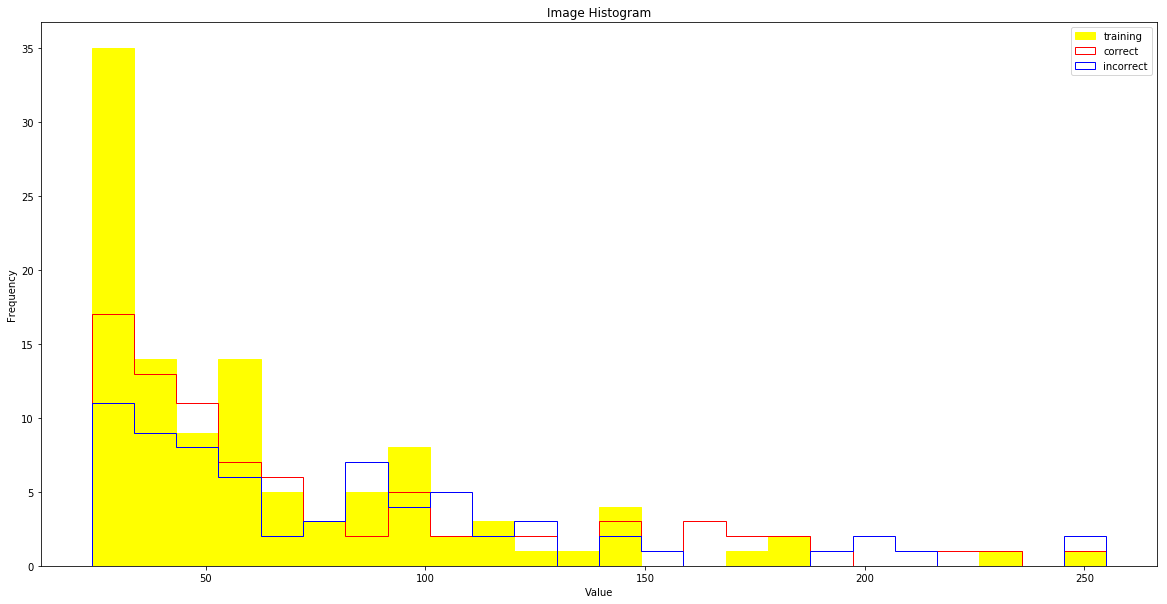

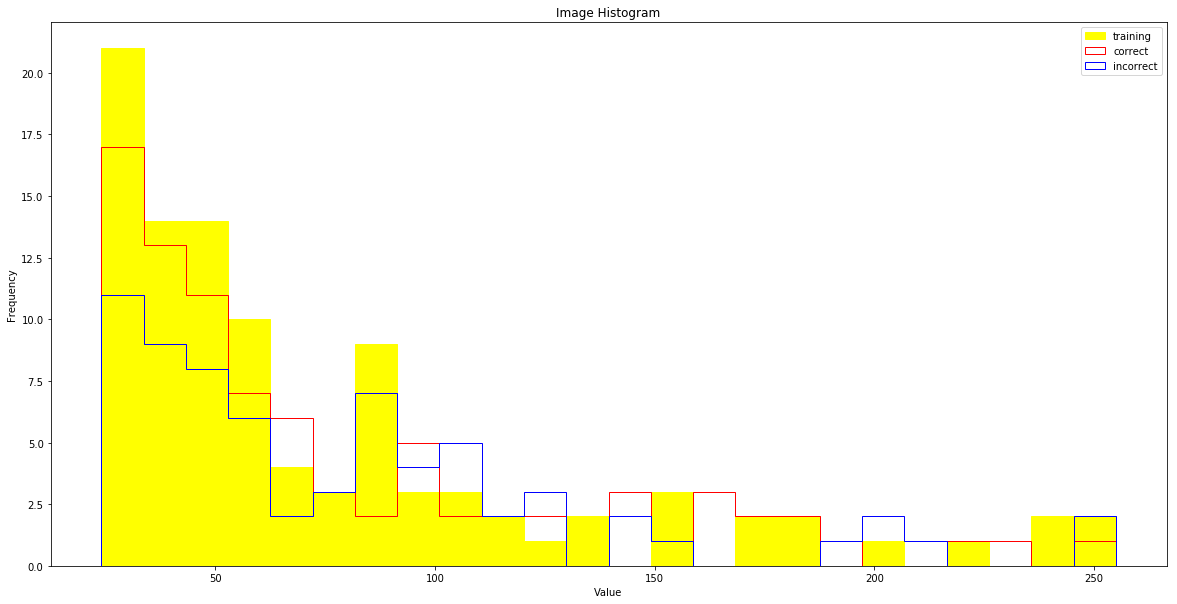

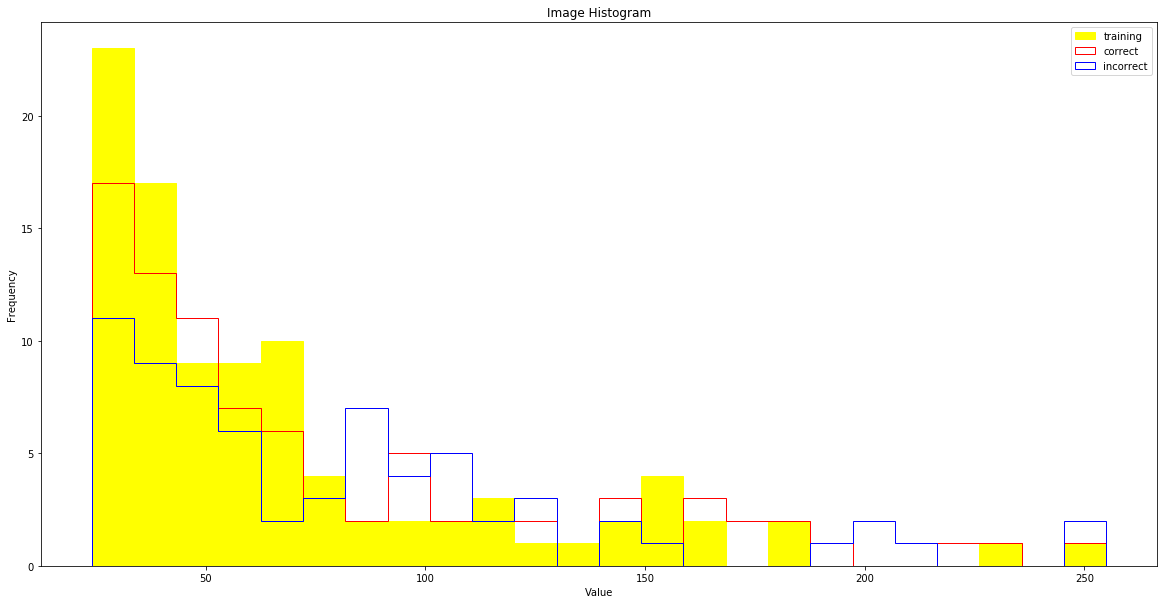

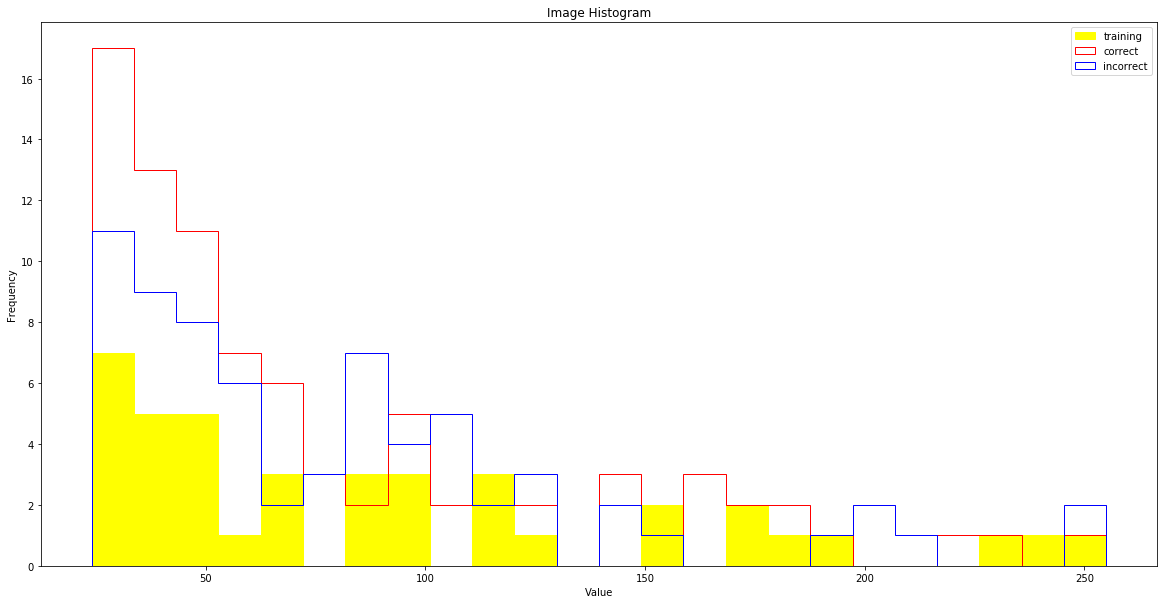

In [452]:
for id_no in sample_list:
    plt.hist(array_of_50x50_training_crops[id_no].flatten(), 24, range=(24, 255),histtype='step', fill=True, color='yellow', label='training')
    plt.hist(correct.flatten().flatten(), 24, range=(24, 255), histtype='step', fill=False, color='red', label='correct')
    plt.hist(incorrect.flatten(), 24, range=(24, 255), histtype='step', fill=False, color='blue', label='incorrect')
    plt.title("Image Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

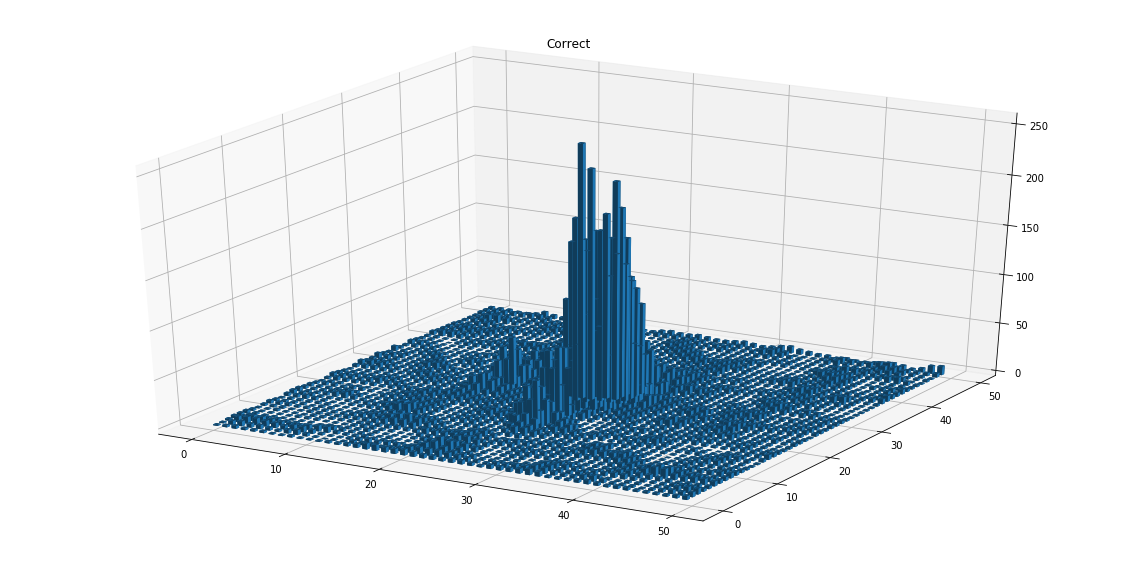

In [478]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(correct.shape[1]),
                              np.arange(correct.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = correct.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          .5, .5, z_data )
plt.title("Correct")
plt.show()


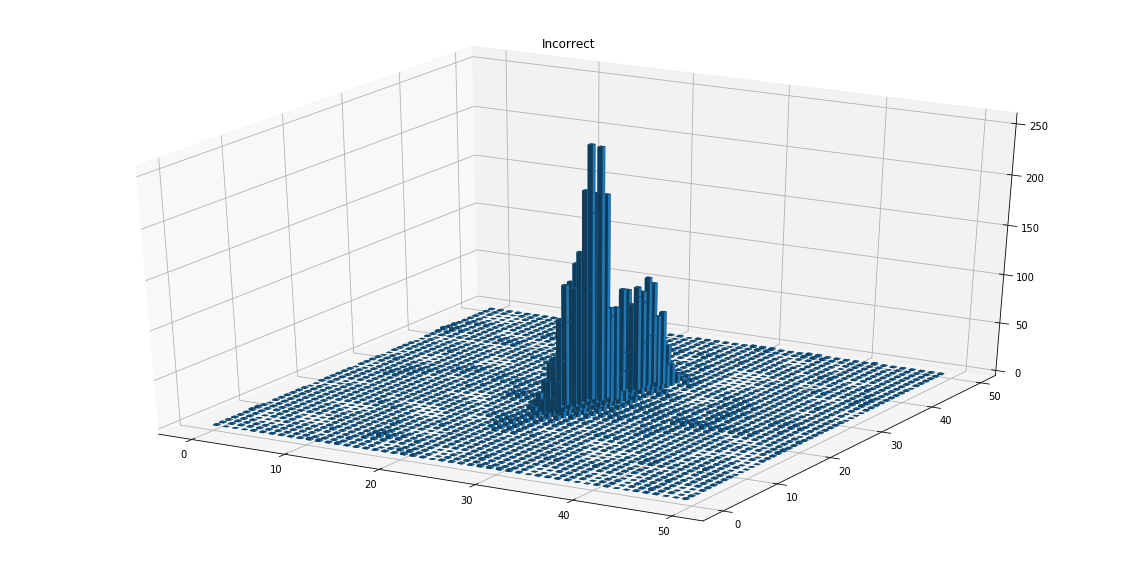

In [479]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(incorrect.shape[1]),
                              np.arange(incorrect.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = incorrect.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          .5, .5, z_data )
plt.title("Incorrect")
plt.show()

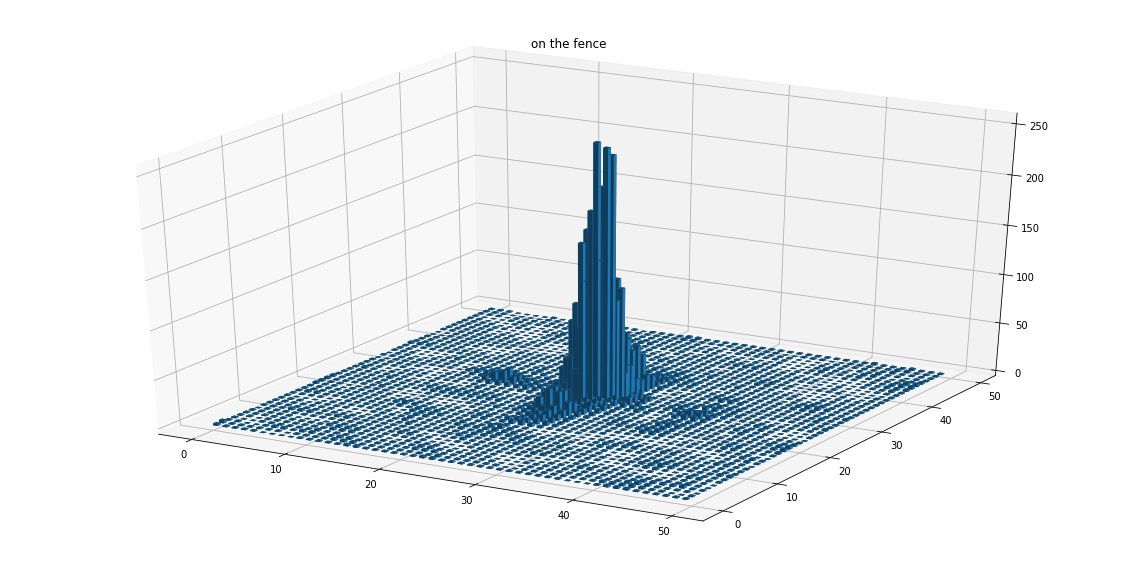

In [480]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(on_fence.shape[1]),
                              np.arange(on_fence.shape[0]) )

x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = on_fence.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          0.5, 0.5, z_data )
plt.title("on the fence")
plt.show()

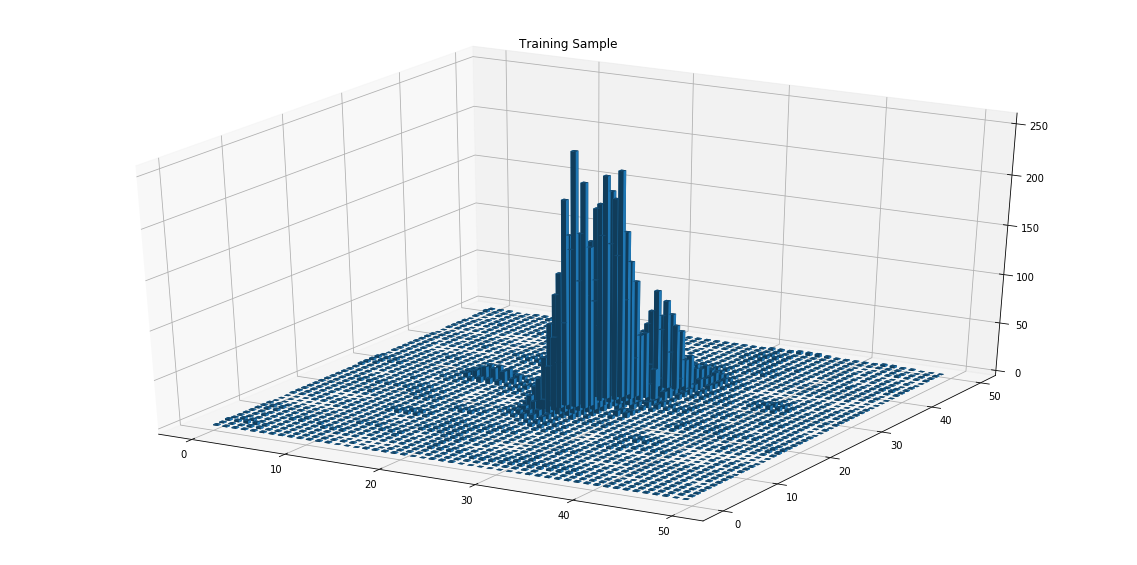

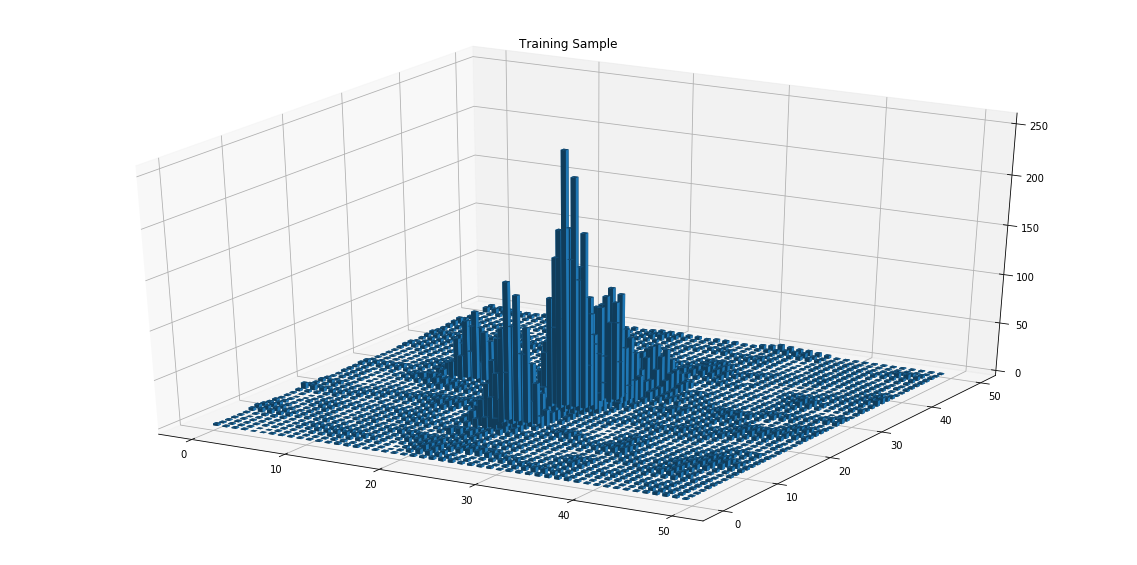

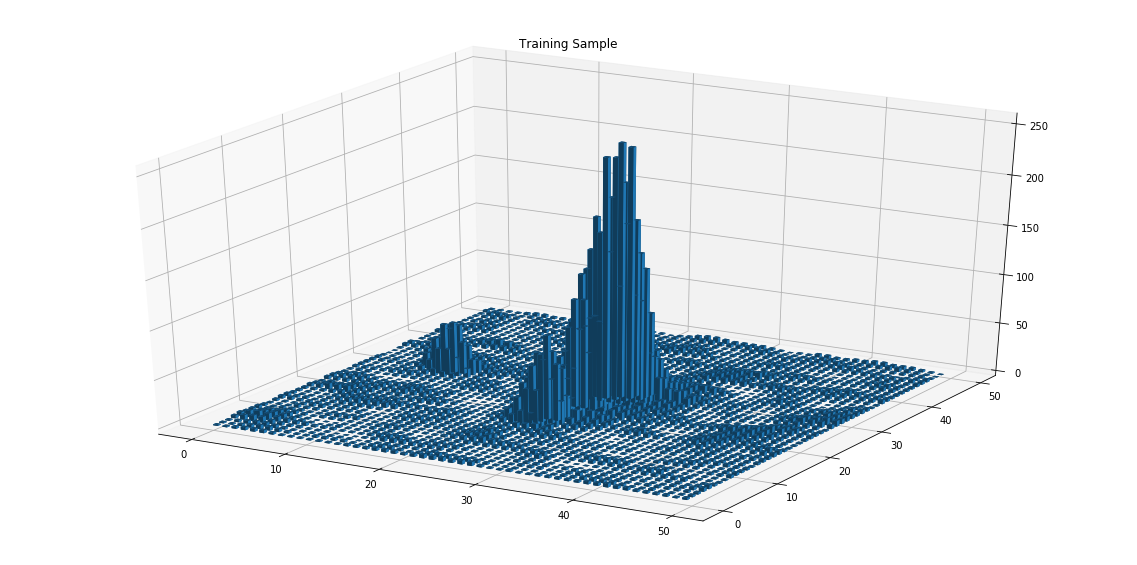

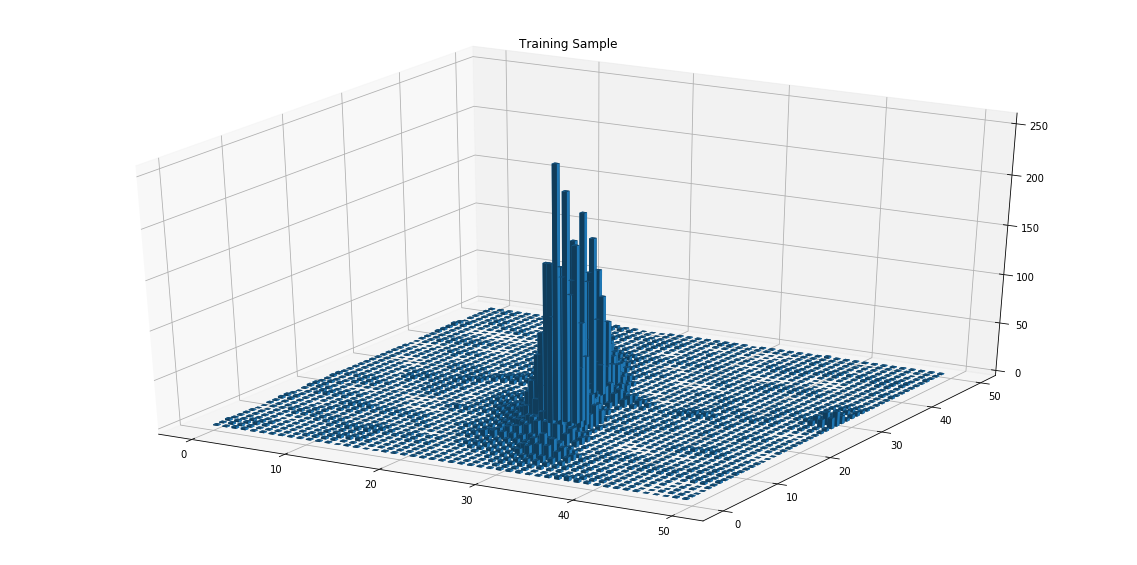

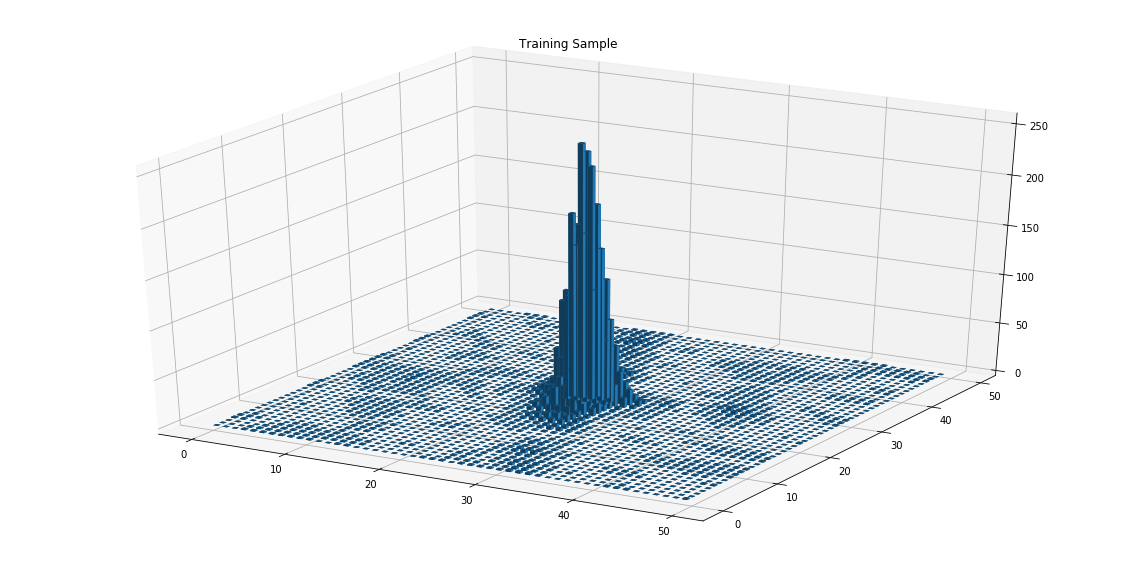

In [481]:
for id_no in sample_list:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_data, y_data = np.meshgrid(np.arange(array_of_50x50_training_crops[id_no].shape[1]),
                              np.arange(array_of_50x50_training_crops[id_no].shape[0]) )

    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = array_of_50x50_training_crops[id_no].flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              .5, 0.5, z_data )
    plt.title("Training Sample")
    plt.show()

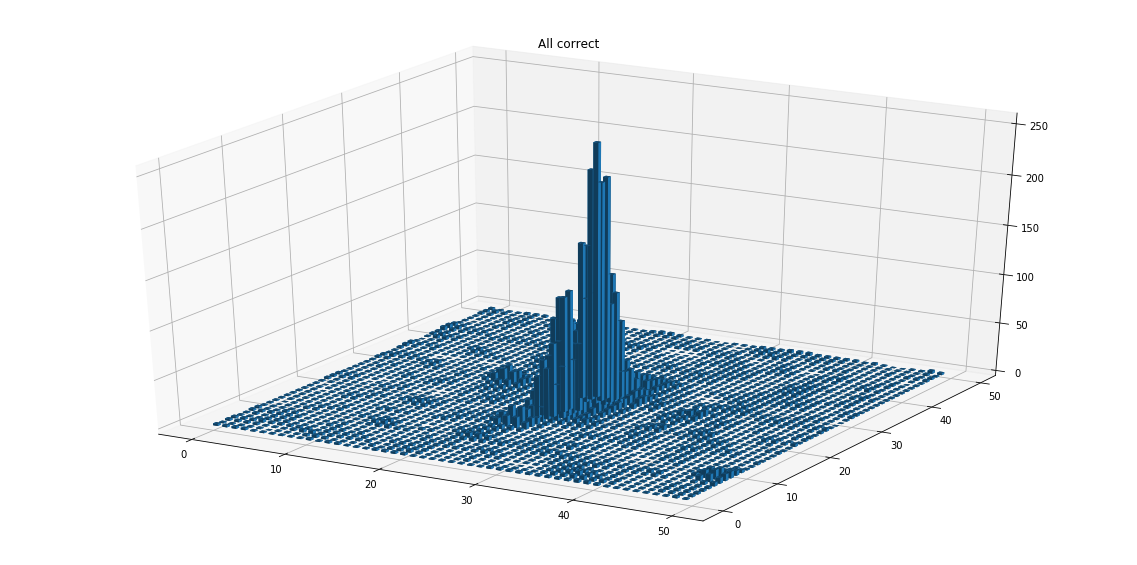

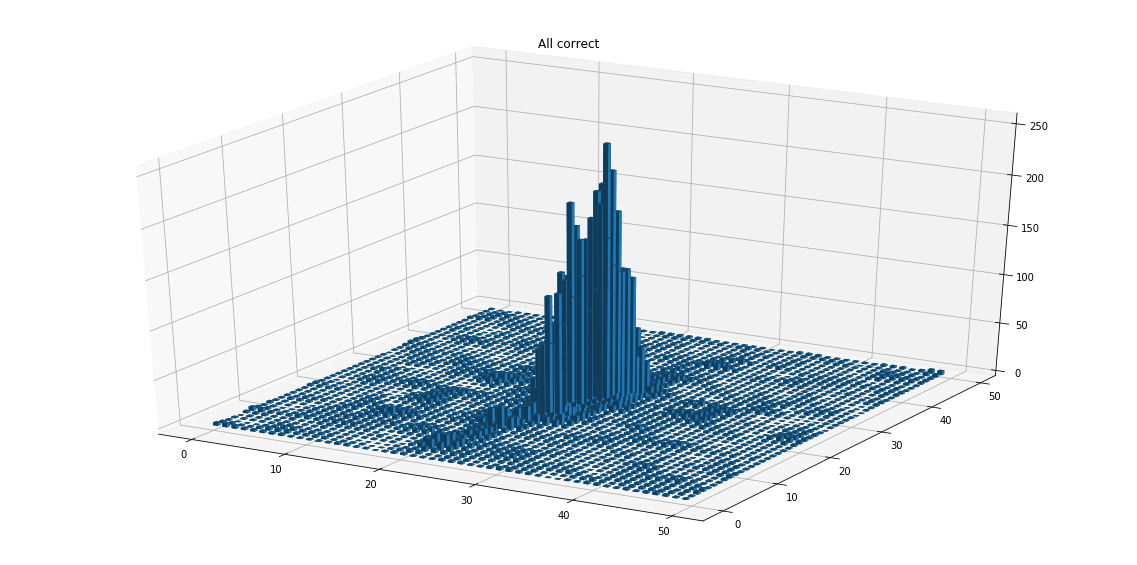

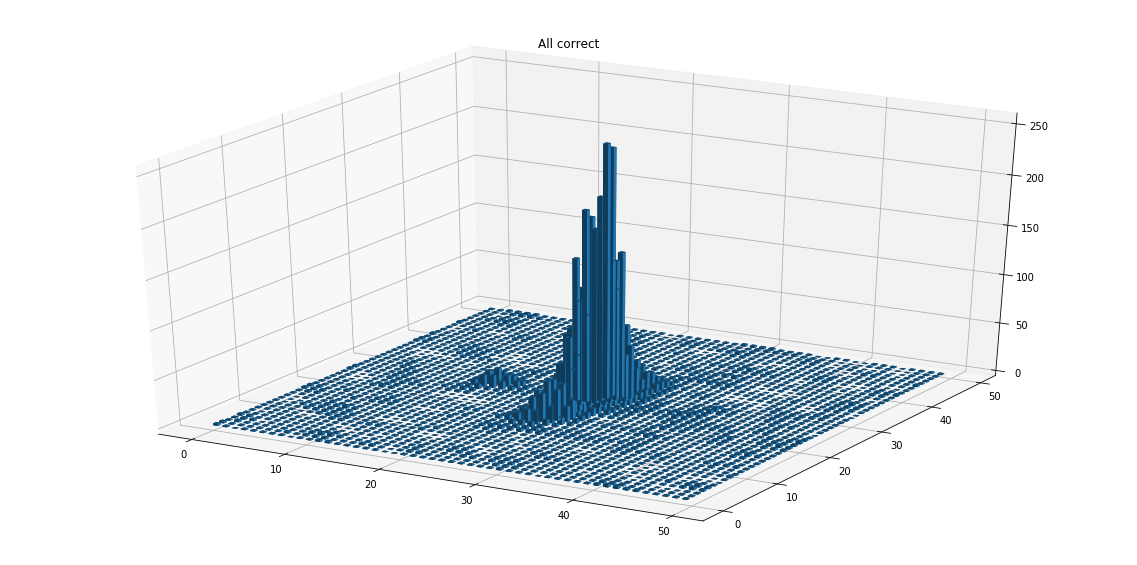

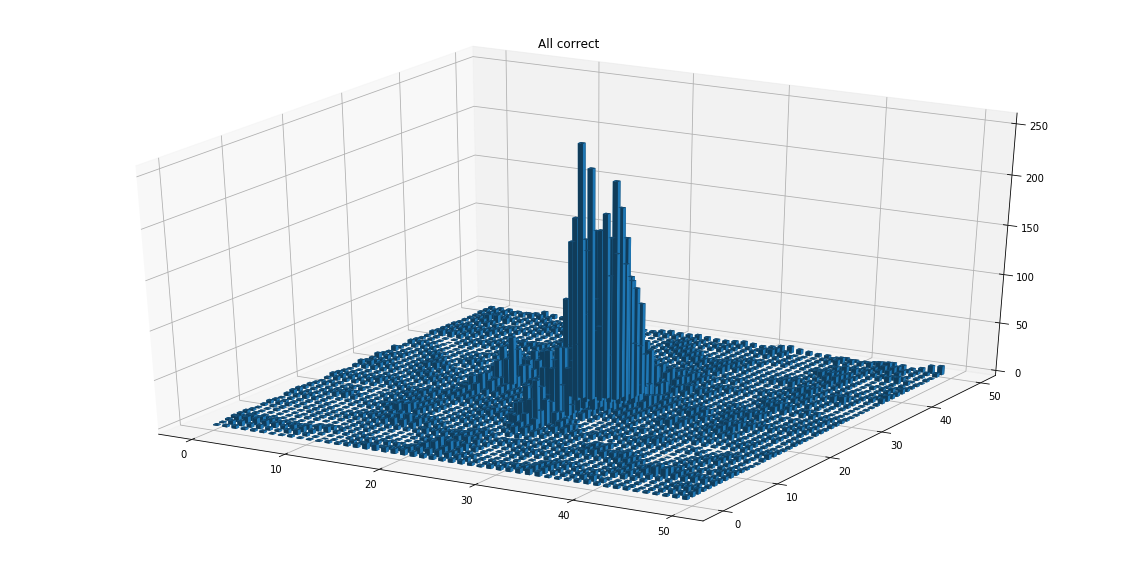

In [482]:
for id_no in list_of_blob_ids:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x_data, y_data = np.meshgrid(np.arange(array_of_50x50_crops[id_no].shape[1]),
                              np.arange(array_of_50x50_crops[id_no].shape[0]) )

    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = array_of_50x50_crops[id_no].flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              0.5, 0.5, z_data )
    plt.title("All correct")
    plt.show()